# Conv Model
### progressive training (expecting faster and stable converge)

In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

import mglearn
#import t_Mod
from t_Mod import *
#from t_Mod.plots_t import *

In [2]:
#plt.rcParams['figure.figsize'] = (5,5)
#plt.rcParams['figure.dpi'] = 72
#plt.rcParams['lines.linewidth'] = 4
#plt.rcParams['axes.grid'] = True
#plt.rcParams['savefig.dpi'] = 200
#plt.rcParams['savefig.transparent'] = True
#plt.rcParams['font.family'] = 'Dejavu Sans'
#plt.rcParams['font.size'] = 14

#plt.rcParams

mpl.rcdefaults()
plt.rcParams['font.size'] = 10

#plt.style.available

#plt.style.use('default')

In [3]:
df = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "constant0(del).csv") )
#df2 = pd.read_csv(
#    os.path.join(mglearn.datasets.DATA_PATH, "constant(val).csv") )
# 예제를 위해 몇개의 열만 선택합니다
#df = df[['IR', 'FlowHt', 'Const', 'Var', 'Base', 'MixS75','MixS50','MixS25']]
#df = df[['IR', 'FlowHt', 'Sand','Ash','delIR','delFlow']]
df = df[['IR', 'FlowHt', 'Sand','Ash','delIR','delFlow']]
#df2 = df2[['IR', 'FlowHt', 'Sand','Ash']]
df['delIF'] = df['delFlow']/df['delIR']*-1

df['delIF']=df['delIF'].replace(np.nan, 0)
df = df[['IR', 'FlowHt', 'Sand','Ash','delIR' ]]

display(df.head())
#display(df2.head())

,IR,FlowHt,Sand,Ash,delIR
0,1.0000,0.0000,1.0,0.0,0.0000
1,0.9995,0.1798,1.0,0.0,-0.0005
2,0.9985,0.5389,1.0,0.0,-0.0010
3,0.9970,1.0757,1.0,0.0,-0.0015
4,0.9950,1.7884,1.0,0.0,-0.0020


In [4]:
df.describe()
#print(df[58:116])


,IR,FlowHt,Sand,Ash,delIR
count,464.000000,464.000000,464.000000,464.000000,464.000000
mean,0.719750,18.216106,0.562500,0.437500,-0.014250
std,0.250962,23.804094,0.292666,0.292666,0.008379
min,0.173500,0.000000,0.100000,0.000000,-0.028500
25%,0.527000,5.900000,0.362500,0.212500,-0.021500
50%,0.789750,8.882400,0.550000,0.450000,-0.014250
75%,0.947500,15.364700,0.787500,0.637500,-0.007000
max,1.000000,98.685300,1.000000,0.900000,0.000000


(1.041325, 0.0)

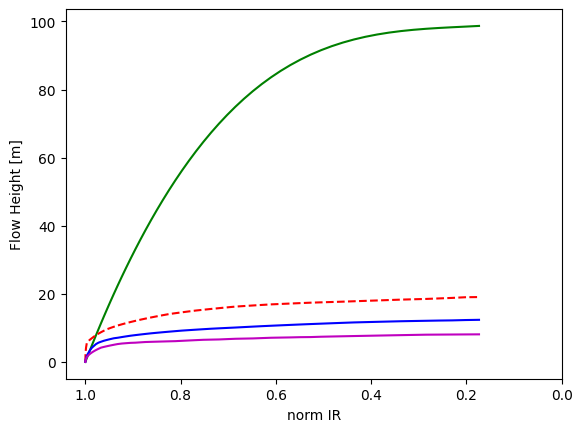

In [5]:

plt.plot(df.iloc[0:58,0], df.iloc[0:58,1], 'g-'
         , df.iloc[58:116,0], df.iloc[58:116,1],'r--'
         ,df.iloc[116:174,0], df.iloc[116:174,1],'b-'
         ,df.iloc[174:232,0], df.iloc[174:232,1], 'm-')
plt.xlabel('norm IR')
plt.ylabel('Flow Height [m]')
#plt.axis('equal')
#plt.axis('square')
plt.xlim([plt.xlim()[1], 0])
#plt.ylim([0,plt.ylim()[1]])
#_ = plt.plot([-100, 100], [-100, 100])


In [6]:
# ## 데이터 정규화

num_features = df.shape[1]
num_features

5

In [7]:
#df['FlowHt']=(df['FlowHt']-df['FlowHt'].mean())/df['FlowHt'].std()


df.describe()

,IR,FlowHt,Sand,Ash,delIR
count,464.000000,464.000000,464.000000,464.000000,464.000000
mean,0.719750,18.216106,0.562500,0.437500,-0.014250
std,0.250962,23.804094,0.292666,0.292666,0.008379
min,0.173500,0.000000,0.100000,0.000000,-0.028500
25%,0.527000,5.900000,0.362500,0.212500,-0.021500
50%,0.789750,8.882400,0.550000,0.450000,-0.014250
75%,0.947500,15.364700,0.787500,0.637500,-0.007000
max,1.000000,98.685300,1.000000,0.900000,0.000000


,IR,FlowHt,Sand,Ash,delIR
count,4.640000e+02,4.640000e+02,4.640000e+02,4.640000e+02,4.640000e+02
mean,8.958351e-16,5.206563e-16,1.025999e-15,-4.594026e-17,-1.171477e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.176627e+00,-7.652509e-01,-1.580300e+00,-1.494878e+00,-1.700605e+00
25%,-7.680453e-01,-5.173944e-01,-6.833730e-01,-7.687946e-01,-8.652203e-01
50%,2.789270e-01,-3.921051e-01,-4.271081e-02,4.271081e-02,-1.242062e-15
75%,9.075088e-01,-1.197864e-01,7.687946e-01,6.833730e-01,8.652203e-01
max,1.116704e+00,3.380477e+00,1.494878e+00,1.580300e+00,1.700605e+00


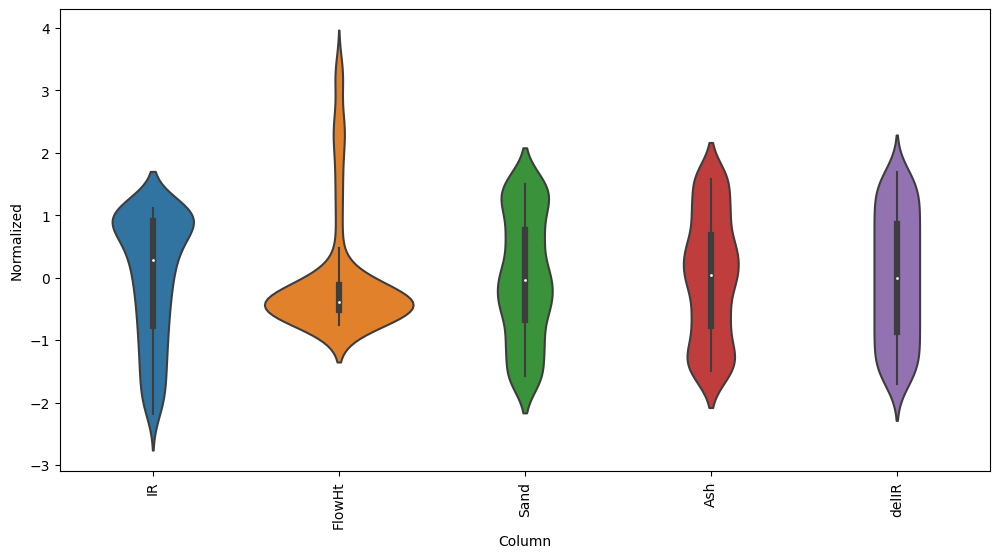

In [8]:
df_mean = df.mean()
df_std = df.std()
df_std_s = (df - df_mean) / df_std
df_std_m = df_std_s.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std_m)
_ = ax.set_xticklabels(df.keys(), rotation=90)
df_std_s.describe()

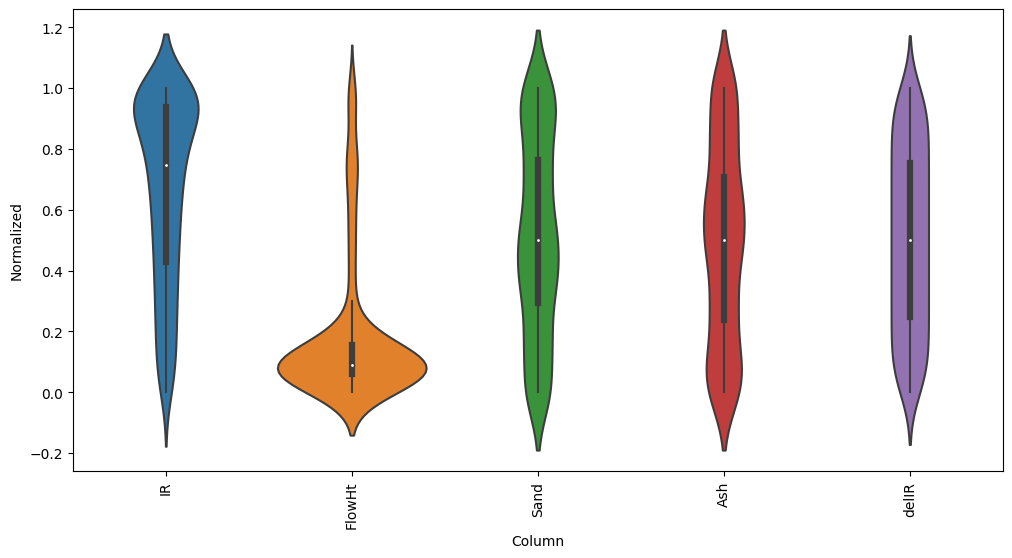

In [9]:
df_min = df.min()
df_max = df.max()
df_std_01 = (df - df_min) / (df_max-df_min)
df_std_m01 = df_std_01.melt(var_name='Column', value_name='Normalized')
fig = plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std_m01)
_ = ax.set_xticklabels(df.keys(), rotation=90)
df_std_s.describe()
plt.show()

fig.savefig("fig_con_02/viol.png", dpi=300)
#fig.savefig("fig_con_02/viol.svg", dpi=300)
#fig.savefig("fig_con_02/viol.eps", dpi=300)


In [10]:
# data
df_org = df
df = df_std_s
df = df_std_01

column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)*0.5

curve_0 = df[0:int(n*0.25)].copy()
curve_1 = df[int(n*0.25):int(n*0.5)].copy()
curve_2 = df[int(n*0.5):int(n*0.75)].copy()
curve_3 = df[int(n*0.75):int(n)].copy()
curve_4 = df[int(n):].copy()
#train_df_s = train_df_s.reset_index(drop=True)

In [11]:
df.describe()
#print(df[58:116])

,IR,FlowHt,Sand,Ash,delIR
count,464.000000,464.000000,464.000000,464.000000,464.000000
mean,0.660920,0.184588,0.513889,0.486111,0.500000
std,0.303644,0.241212,0.325184,0.325184,0.294013
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.427707,0.059786,0.291667,0.236111,0.245614
50%,0.745614,0.090007,0.500000,0.500000,0.500000
75%,0.936479,0.155694,0.763889,0.708333,0.754386
max,1.000000,1.000000,1.000000,1.000000,1.000000


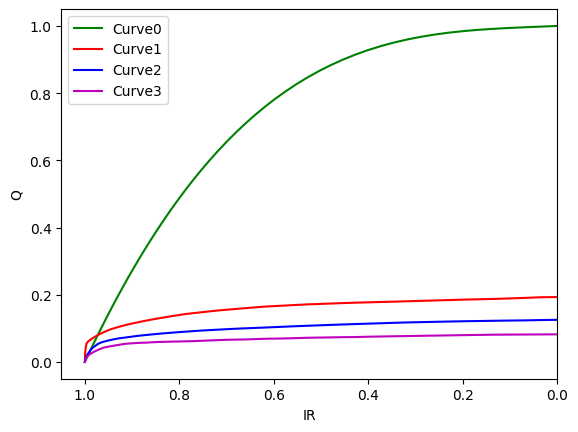

In [12]:

plt.plot(df.iloc[0:58,0], df.iloc[0:58,1], 'g-', label='Curve0')
plt.plot(df.iloc[58:116,0], df.iloc[58:116,1],'r-', label='Curve1')
plt.plot(df.iloc[116:174,0], df.iloc[116:174,1],'b-', label='Curve2')
plt.plot(df.iloc[174:232,0], df.iloc[174:232,1], 'm-', label='Curve3')
plt.xlabel('IR')
plt.ylabel('Q')
#plt.axis('equal')
#plt.axis('square')
plt.xlim([plt.xlim()[1],0])
#plt.ylim([0,plt.ylim()[1]])
#_ = plt.plot([1, 0], [0, 1])
plt.legend()

#,transparent = True

plt.savefig("fig_con_02/normcurves.png",transparent = True, dpi=300)
#plt.savefig("fig_con_02/normcurves.svg", dpi=300)
#plt.savefig("fig_con_02/normcurves.eps", dpi=300)


### for Publish
### curve_0


In [13]:
crv_0 = curve_0.copy()
crv_0 = crv_0.reset_index(drop=True)
#m1 = int(n*0.2)
m1 = int(len(curve_0))
#
m = m1*1.0
train_df_00 = crv_0[0:int(m*0.8)]
val_df_00 = crv_0[int(m*0.8):int(m*1.0)]
test_df_00 = crv_0[int(m*0.8):int(m)]

for i in range(2, 4):
#    m = m1*0.33334*i
    if i == 2 : m = m1*0.9
    if i == 3 : m = m1*1.0
    train_df_0 = crv_0[0:int(m*0.6)]
    val_df_0 = crv_0[int(m*0.6):int(m*0.8)]
    test_df_0 = crv_0[int(m*0.8):int(m)]
    exec(f'train_df_0{i-1} = train_df_0')
    exec(f'val_df_0{i-1} = val_df_0')
    exec(f'test_df_0{i-1} = test_df_0')



In [14]:
train_total = [train_df_00, train_df_01, train_df_02]
val_total = [val_df_00, val_df_01, val_df_02]
test_total = [test_df_00, test_df_01, test_df_02]

ttt = { 'tr' : train_total, 'va' : val_total, 'te' : test_total}
#ttt = { 'tr' : train_total, 'va' : val_total, 'te' : val_total}
ttt = pd.DataFrame(ttt)
print(ttt.columns)
print(ttt.index)

Index(['tr', 'va', 'te'], dtype='object')
RangeIndex(start=0, stop=3, step=1)


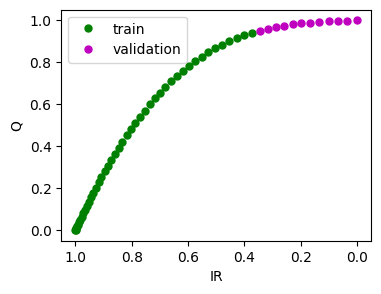

In [15]:
def plot_curve2(trg=None, valg=None, teg=None):
    if(trg is not None) : plt.plot(trg['IR'], trg['FlowHt'], 'go', label='train', markersize=5, zorder=1)
    if(valg is not None) : plt.plot(valg['IR'], valg['FlowHt'], 'mo', label='validation',  markersize=5, zorder=1)
    if(teg is not None) : plt.plot(teg['IR'], teg['FlowHt'], 'ro', label='test',  markersize=5, zorder=1)
    plt.xlabel('IR')
    plt.ylabel('Q')
    #plt.xlim([plt.xlim()[1], plt.xlim()[0]])
    plt.legend(loc='best')
    plt.gca().invert_xaxis()
   # plt.gca().invert_yaxis()
#from t_Mod.plots_t import plot_curve, eval, add_curve # absolute path, import 함수

for i in range(0, 1) :
 #   for x in dat_list :
        plt.figure(figsize=(4, 3))
        tr = ttt.iloc[i]['tr']
        va = ttt.iloc[i]['va']
        te = ttt.iloc[i]['te']
    #    plot_curve2(trg = tr, valg = va)
        plot_curve2( tr,  va)
   #     plots_t.plot_curve(tr, va, va)
#        t_Mod.plots_t.plot_curve(tr, va, te)
#plt.gca().set_xlim(1.05, 0)
#plt.gca().set_ylim(0, 105)
#plt.invert_xaxis()

plt.savefig("fig_con_02/crv0.png", dpi=300)


### curve_1

In [16]:
crv_1 = curve_1.copy()
m1 = int(len(crv_1))
m = m1*1.0
train_df_10 = crv_1[0:int(m*0.8)]
val_df_10 = crv_1[int(m*0.8):int(m*1.0)]
test_df_10 = crv_1[int(m*0.8):int(m)]

for i in range(2, 4):
    m = m1*0.33334*i
    train_df_1 = crv_1[0:int(m*0.6)]
    val_df_1 = crv_1[int(m*0.6):int(m*0.8)]
    test_df_1 = crv_1[int(m*0.8):int(m)]
    exec(f'train_df_1{i-1} = train_df_1')
    exec(f'val_df_1{i-1} = val_df_1')
    exec(f'test_df_1{i-1} = test_df_1')

train_t_1 = {0: train_df_10 , 1: train_df_11, 2: train_df_12 }
val_t_1 = {0: val_df_10 , 1: val_df_11, 2: val_df_12 }
test_t_1 = {0: test_df_10 , 1: test_df_11, 2: test_df_12 }

ttt_1 = { 'tr' : train_t_1, 'va' : val_t_1, 'te' : test_t_1}
ttt_1 = pd.DataFrame(ttt_1)

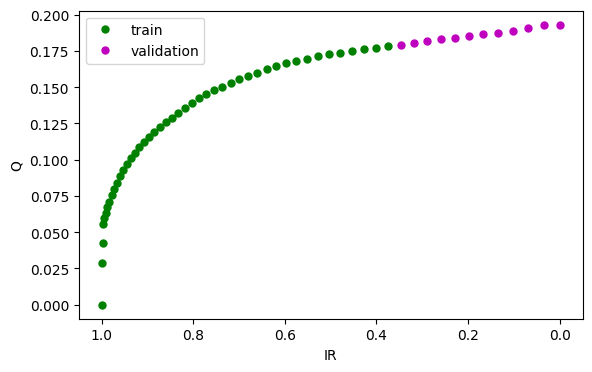

In [17]:
for i in range(0, 1) :
 #   for x in dat_list :
        plt.figure(figsize=((6.5, 4)))
        tr = ttt_1.iloc[i]['tr']
        va = ttt_1.iloc[i]['va']
        te = ttt_1.iloc[i]['te']
        plot_curve2( tr, va )
#plt.gca().set_xlim(1.05, 0)
#plt.gca().set_ylim(0, 25)
plt.savefig("fig_con_02/crv1.png", dpi=300)

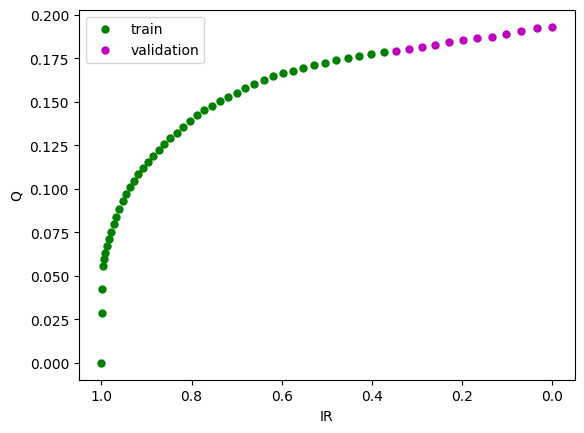

In [18]:
ax = plt.figure()
plot_curve2(train_df_10, val_df_10)


### curve_2
#### test set 100%, use train as test

In [19]:
crv_2 = curve_2.copy()
m1 = int(len(crv_2))
m = m1*1.0
train_df_20 = crv_2[0:int(m*0.8)]
val_df_20 = crv_2[int(m*0.8):int(m*1.0)]
test_df_20 = crv_2[int(m*0.0):int(m)]

for i in range(2, 4):
    m = m1*0.33334*i
    train_df_2 = crv_2[0:int(m*0.6)]
    val_df_2 = crv_2[int(m*0.6):int(m*0.8)]
    test_df_2 = crv_2[int(m*0.0):int(m)]
    exec(f'train_df_2{i-1} = train_df_2')
    exec(f'val_df_2{i-1} = val_df_2')
    exec(f'test_df_2{i-1} = test_df_2')

train_t_2 = {0: train_df_20 , 1: train_df_21, 2: train_df_22 }
val_t_2 = {0: val_df_20 , 1: val_df_21, 2: val_df_22 }
test_t_2 = {0: test_df_20 , 1: test_df_21, 2: test_df_22 }

ttt_2 = { 'tr' : train_t_2, 'va' : val_t_2, 'te' : test_t_2}
ttt_2 = pd.DataFrame(ttt_2)

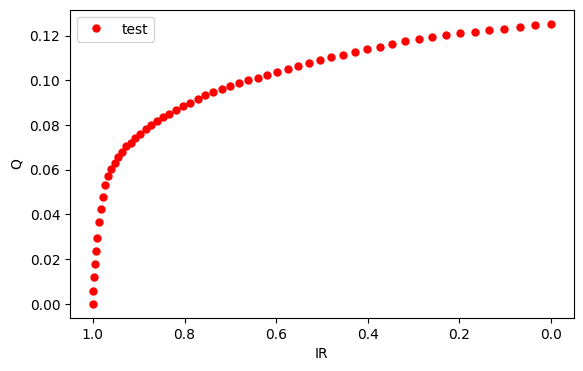

In [20]:
for i in range(0, 1) :
 #   for x in dat_list :
        plt.figure(figsize=(6.5, 4))
        tr = ttt_2.iloc[i]['tr']
        va = ttt_2.iloc[i]['va']
        te = ttt_2.iloc[i]['te']
        plot_curve2(teg = te)
#plt.gca().set_xlim(1.05, 0)
#plt.gca().set_ylim(0, 15)
plt.savefig("fig_con_02/crv2.png", dpi=300)

# curve 3

In [21]:
crv_3 = curve_3.copy()
m1 = int(len(crv_3))
m = m1*1.0
train_df_30 = crv_3[0:int(m*0.8)]
val_df_30 = crv_3[int(m*0.8):int(m*1.0)]
test_df_30 = crv_3[int(m*0.8):int(m)]

for i in range(2, 4):
    m = m1*0.33334*i
    train_df_3 = crv_3[0:int(m*0.8)]
    val_df_3 = crv_3[int(m*0.6):int(m*0.8)]
    test_df_3 = crv_3[int(m*0.8):int(m)]
    exec(f'train_df_3{i-1} = train_df_3')
    exec(f'val_df_3{i-1} = val_df_3')
    exec(f'test_df_3{i-1} = test_df_3')

train_t_3 = {0: train_df_30 , 1: train_df_31, 2: train_df_32 }
val_t_3 = {0: val_df_30 , 1: val_df_31, 2: val_df_32 }
test_t_3 = {0: test_df_30 , 1: test_df_31, 2: test_df_32 }

ttt_3 = { 'tr' : train_t_3, 'va' : val_t_3, 'te' : test_t_3}
ttt_3 = pd.DataFrame(ttt_3)

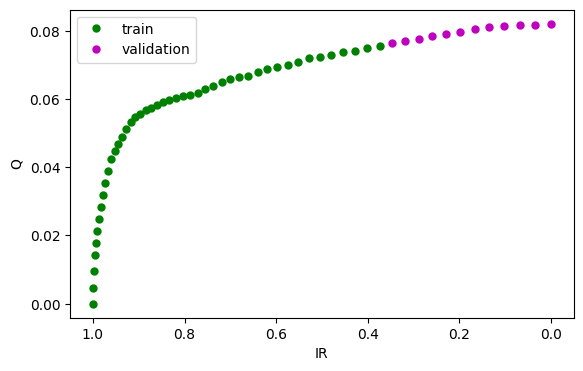

In [22]:
for i in range(0, 1) :
 #   for x in dat_list :
        plt.figure(figsize=(6.5, 4))
        tr = ttt_3.iloc[i]['tr']
        va = ttt_3.iloc[i]['va']
        te = ttt_3.iloc[i]['te']
        plot_curve2(tr, va)
#plt.gca().set_xlim(1.05, 0)
#plt.gca().set_ylim(0, 12)

plt.savefig("fig_con_02/crv3.png", dpi=300)


## stepped for three parts of curve Data


### curve_0

In [23]:
crv_0 = curve_0.copy()
crv_0 = crv_0.reset_index(drop=True)

In [24]:
#m1 = int(n*0.2)
m1 = int(len(curve_0))
for i in range(1, 4):
    m = m1*0.33334*i
    train_df_0 = crv_0[0:int(m*0.8)]
    val_df_0 = crv_0[int(m*0.8):int(m)]
#    test_df_0 = crv_0[int(m*0.8):int(m)]
#    test_df_0 = crv_0[int(n*0.25*0.2*i-3):int(n*0.25*0.2*(i+1))]
    exec(f'train_df_0{i-1} = train_df_0')
    exec(f'val_df_0{i-1} = val_df_0')
#    exec(f'test_df_0{i-1} = test_df_0')


In [25]:
#train_total = {0: train_df_00 , 1: train_df_01, 2: train_df_02, 3: train_df_03}
#val_total = {0: val_df_00 , 1: val_df_01, 2: val_df_02, 3: val_df_03}
#test_total = {0: test_df_00 , 1: test_df_01, 2: test_df_02, 3: test_df_03}

train_total = [train_df_00, train_df_01, train_df_02]
val_total = [val_df_00, val_df_01, val_df_02]
#test_total = [test_df_00, test_df_01, test_df_02]

#ttt = { 'tr' : train_total, 'va' : val_total, 'te' : test_total}
ttt = { 'tr' : train_total, 'va' : val_total, 'te' : val_total}
ttt = pd.DataFrame(ttt)
print(ttt.columns)
print(ttt.index)

Index(['tr', 'va', 'te'], dtype='object')
RangeIndex(start=0, stop=3, step=1)


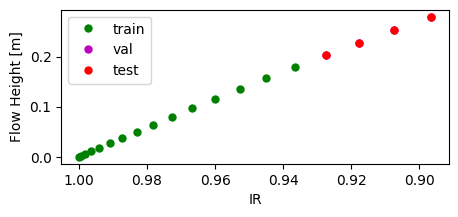

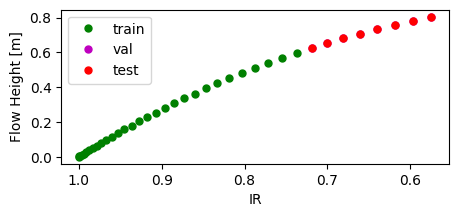

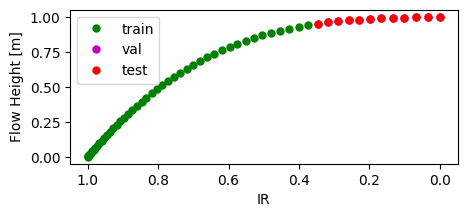

In [26]:
#from t_Mod.plots_t import plot_curve, eval, add_curve # absolute path, import 함수

for i in range(0, 3) :
 #   for x in dat_list :
        plt.figure(figsize=(5, 2))
        tr = ttt.iloc[i]['tr']
        va = ttt.iloc[i]['va']
        te = ttt.iloc[i]['te']
#        plot_curve(tr, va, te)
        plots_t.plot_curve(tr, va, te)
#        t_Mod.plots_t.plot_curve(tr, va, te)

### ---- function plot_curve


In [27]:
from matplotlib.ticker import MaxNLocator

def plot_crvs(fset) :
    #fig = plt.figure(figsize=(9,2))
    fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(9,2), tight_layout = True)
    #fig, ax = plt.subplots(nrows, ncols=1, figsize = (12,fvsize), tight_layout = True)

    for i, set in enumerate(fset[0:3]) :

        tr = set[0]
        va = set[1]
        if fset[3] != '2' :
            axes[i].plot(tr['IR'], tr['FlowHt'], 'o', label='train', markersize=2, c='tab:blue', alpha=0.8 )
            axes[i].plot(va['IR'], va['FlowHt'], 'o', label='val', markersize=2.5, c='tab:red', alpha=0.8 )
        else :
            axes[i].plot(tr['IR'], tr['FlowHt'], 'o', label='test', markersize=2, c='tab:green', alpha=0.8 )

        axes[i].set_xlabel('IR')
        axes[0].set_ylabel('Q')
        axes[i].set_xlim([plt.xlim()[1], plt.xlim()[0]])
        #axes[i].set_ylim([plt.ylim()[0], plt.ylim()[1]])
        axes[0].legend(loc='best')
        #axes[i].invert_xaxis()
        axes[i].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
        axes[i].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
        axes[i].yaxis.set_major_locator(MaxNLocator(5))
        axes[0].text(0.8,0.1, "Curve"+fset[3], ha="center", transform=axes[0].transAxes)
        #axes[0].margins(0.2)
        if fset[3]=='2' : break

    return (axes)


(0.0, 1.05)

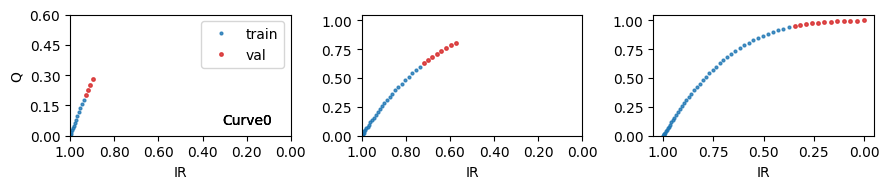

In [28]:
fset = ( [train_df_00, val_df_00],[train_df_01, val_df_01],[train_df_02, val_df_02],'0')
axes = plot_crvs(fset)
axes[0].set_ylim(0,0.6)
axes[1].set_ylim(0,1.05)
axes[2].set_ylim(0,1.05)


### curve_1

In [29]:
crv_1 = curve_1.copy()
#crv_1 = crv_1.reset_index(drop=True)

In [30]:
m1 = int(len(curve_1))
for i in range(1, 4):
    m = m1*0.33334*i
    train_df_1 = crv_1[0:int(m*0.8)]
    val_df_1 = crv_1[int(m*0.8):int(m)]
    exec(f'train_df_1{i-1} = train_df_1')
    exec(f'val_df_1{i-1} = val_df_1')

In [31]:
train_t_1 = {0: train_df_10 , 1: train_df_11, 2: train_df_12 }
val_t_1 = {0: val_df_10 , 1: val_df_11, 2: val_df_12 }
#test_t_1 = {0: test_df_10 , 1: test_df_11, 2: test_df_12 }

ttt_1 = { 'tr' : train_t_1, 'va' : val_t_1, 'te' : val_t_1}
ttt_1 = pd.DataFrame(ttt_1)

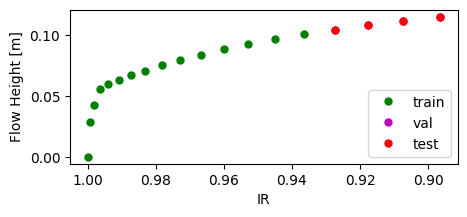

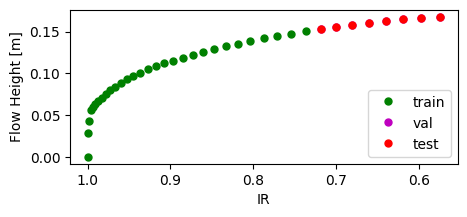

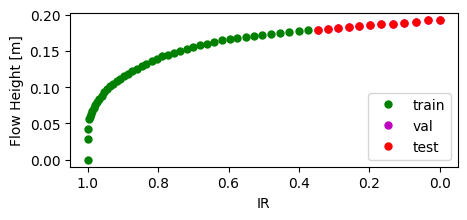

In [32]:
for i in range(0, 3) :
 #   for x in dat_list :
        plt.figure(figsize=(5, 2))
        tr = ttt_1.iloc[i]['tr']
        va = ttt_1.iloc[i]['va']
        te = ttt_1.iloc[i]['te']
        plots_t.plot_curve(tr, va, te)

(0.0, 0.3)

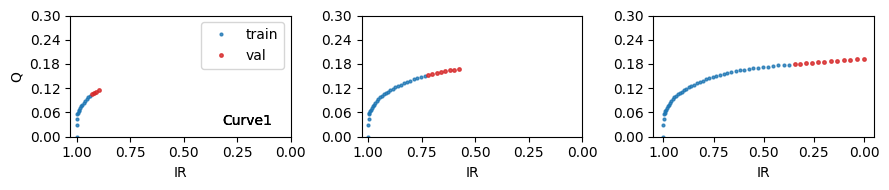

In [33]:
fset = ([train_df_10, val_df_10],[train_df_11, val_df_11],[train_df_12, val_df_12],'1')
axes = plot_crvs(fset)
axes[0].set_ylim(0,0.3)
axes[0].set_xlim(1.03,0)
axes[1].set_ylim(0,0.3)
axes[1].set_xlim(1.03,0)
axes[2].set_ylim(0,0.3)

### curve_2

In [34]:
crv_2 = curve_2.copy()
m1 = int(len(crv_2))
m = m1*1.0
train_df_20 = crv_2[0:int(m*0.8)]
val_df_20 = crv_2[int(m*0.8):int(m*1.0)]
test_df_20 = crv_2[int(m*0.0):int(m)]

for i in range(2, 4):
    m = m1*0.33334*i
    train_df_2 = crv_2[0:int(m*0.6)]
    val_df_2 = crv_2[int(m*0.6):int(m*0.8)]
    test_df_2 = crv_2[int(m*0.8):int(m)]
    exec(f'train_df_2{i-1} = train_df_2')
    exec(f'val_df_2{i-1} = val_df_2')
    exec(f'test_df_2{i-1} = test_df_2')

train_t_2 = {0: train_df_20 , 1: train_df_21, 2: train_df_22 }
val_t_2 = {0: val_df_20 , 1: val_df_21, 2: val_df_22 }
test_t_2 = {0: test_df_20 , 1: test_df_21, 2: test_df_22 }

ttt_2 = { 'tr' : train_t_2, 'va' : val_t_2, 'te' : test_t_2}
ttt_2 = pd.DataFrame(ttt_2)

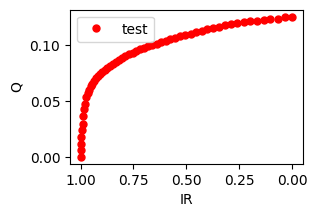

In [35]:
for i in range(0, 1) :
 #   for x in dat_list :
        plt.figure(figsize=(3, 2))
        tr = ttt_2.iloc[i]['tr']
        va = ttt_2.iloc[i]['va']
        te = ttt_2.iloc[i]['te']
        plot_curve2(teg = te)
#plt.gca().set_xlim(1.05, 0)
#plt.gca().set_ylim(0, 15)
#plt.savefig("fig_con_02/crv2.png", dpi=300)

(0.0, 0.2)

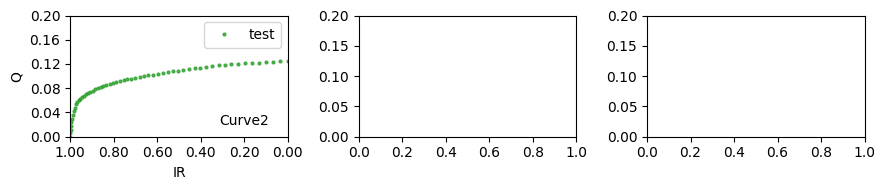

In [36]:
fset = ( [test_df_20, test_df_20],[test_df_21, test_df_21],[test_df_22, test_df_22], '2' )
axes = plot_crvs(fset)
axes[0].set_ylim(0,0.2)
axes[1].set_ylim(0,0.2)
axes[2].set_ylim(0,0.2)

### curve_3

In [37]:
crv_3 = curve_3.copy()
#crv_2 = crv_2.reset_index(drop=True)

In [38]:
m1 = int(len(curve_3))
for i in range(1, 4):
    m = m1*0.33334*i
    train_df_3 = crv_3[0:int(m*0.8)]
    val_df_3 = crv_3[int(m*0.8):int(m)]
    exec(f'train_df_3{i-1} = train_df_3')
    exec(f'val_df_3{i-1} = val_df_3')

In [39]:
train_t_3 = {0: train_df_30 , 1: train_df_31, 2: train_df_32 }
val_t_3 = {0: val_df_30 , 1: val_df_31, 2: val_df_32 }
#test_t_1 = {0: test_df_10 , 1: test_df_11, 2: test_df_12 }

ttt_3 = { 'tr' : train_t_3, 'va' : val_t_3, 'te' : val_t_3}
ttt_3 = pd.DataFrame(ttt_3)

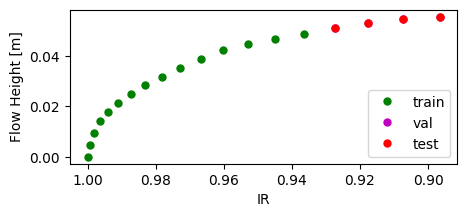

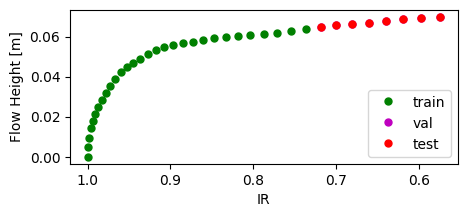

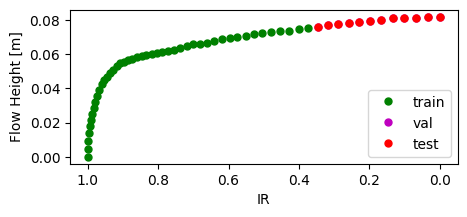

In [40]:
for i in range(0, 3) :
 #   for x in dat_list :
        plt.figure(figsize=(5, 2))
        tr = ttt_3.iloc[i]['tr']
        va = ttt_3.iloc[i]['va']
        te = ttt_3.iloc[i]['te']
        plots_t.plot_curve(tr, va, te)

(0.0, 0.2)

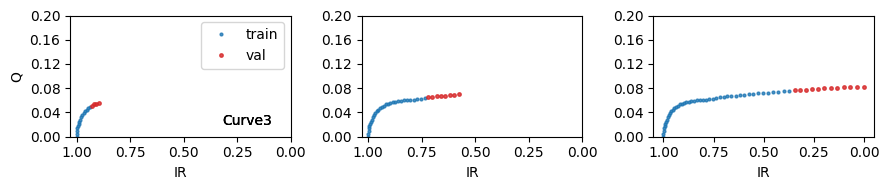

In [41]:
fset = ([train_df_30, val_df_30],[train_df_31, val_df_31],[train_df_32, val_df_32],'3')
axes = plot_crvs(fset)
axes[0].set_ylim(0,0.2)
axes[0].set_xlim(1.03,0)
axes[1].set_ylim(0,0.2)
axes[1].set_xlim(1.03,0)
axes[2].set_ylim(0,0.2)

#### WindowGrerator Class
#### WinGen()

In [42]:
# WindowGen needs train_df
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
train_df = train_df_01.copy()
val_df = val_df_01.copy()
test_df = val_df_01.copy()


In [43]:
single_step_window = Class_t.WindowGenerator(
    input_width=1, label_width=1, shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['FlowHt']

In [44]:
single_step_window_t = Class_t.WinGen(
    input_width=1, label_width=1, shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])
single_step_window_t


Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['FlowHt']

In [45]:
CONV_WIDTH = 3
conv_window = Class_t.WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
        train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

conv_window

conv_window_t = Class_t.WinGen(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
        train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

conv_window_t

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['FlowHt']

In [46]:
wide_window = Class_t.WindowGenerator(
    input_width=8, label_width=8, shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_window
#print(wide_window)
wide_window_t = Class_t.WinGen(
    input_width=8, label_width=8, shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_window_t

Total window size: 9
Input indices: [0 1 2 3 4 5 6 7]
Label indices: [1 2 3 4 5 6 7 8]
Label column name(s): ['FlowHt']

In [47]:
LABEL_WIDTH = 8
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = Class_t.WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_conv_window

Total window size: 11
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [ 3  4  5  6  7  8  9 10]
Label column name(s): ['FlowHt']

In [48]:
wide_conv_window_t = Class_t.WinGen(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_conv_window_t

Total window size: 11
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [ 3  4  5  6  7  8  9 10]
Label column name(s): ['FlowHt']

# functions

In [49]:
def fit_3(model, window,   patience=2, EPOCHS=None):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')
    history = model.fit(window.train, epochs=EPOCHS,
                      validation_data=window.val, verbose=0
                     , callbacks=[early_stopping])
    return history



In [50]:
def plot_xy1(model=None, window=None, window_t=None, dset_name=None, plot_col='FlowHt', max_subplots=40,
             n_batch=None, figures=None):
  if dset_name is not None :
      if dset_name == 'train':
            dataset = window_t.train
      elif dset_name == 'val':
            dataset = window_t.val
      elif dset_name == 'test' :
            dataset = window_t.test
#      else :
#            dataset = self.train

  if model is not None :
        fig, ax2 = plt.subplots(figsize =(4,2))
        ax2.margins(0.01)

  fig, ax3 = plt.subplots(figsize =(3,3))
  ax3.margins(0.01)

  markers = ["o", "s", "D", "h"]
  colors = ["blue", "red", "green", "k",  "m", 'cyan', 'y', 'w']

  if dset_name is not None :
      data = [dataset]
  else :
      data = [window_t.train ]
  for j, dataset in enumerate(data) :
      for i, batch in enumerate(dataset) :
            inputs, labels, lab = batch
#            nrows = len(inputs)
#            if nrows == 1 :nrows=2
            if  j == 0 and i == 0 :
              x_max_0 = np.array([tf.reduce_max(labels)])
              x_min_0 = np.array([tf.reduce_min(labels)])

            x_max_tmp = np.array([tf.reduce_max(labels)])
            x_min_tmp = np.array([tf.reduce_min(labels)])
            if x_max_0 <= x_max_tmp:
                x_max = x_max_tmp
                x_max_0 = x_max_tmp
            if x_min_0 >= x_min_tmp:
                x_min = x_min_tmp
                x_min_0 = x_min_tmp

            if model is not None:
                batnum = len(inputs)
                predictions = model(inputs)

                predict0 = predictions.numpy()
                predict1 =  np.concatenate((predict0.T), axis=0)

                predict = np.zeros([batnum+7, batnum]) #batch+window-shift, batch
                for ii in range(batnum) :
                    predict[ii:8+ii, ii] = predict1[0:, ii]

                avg_pred = np.true_divide(predict.sum(1),(predict!=0).sum(1))
                avg_pred = tf.convert_to_tensor(avg_pred, dtype=tf.float32)
                #ax2.scatter(inputs[:,0,0],avg_pred[:batnum],marker='o',label='Predictions', c='#2ca02c', s=64)

           # lt = window_t.train_df
           # lt_num = lt.to_numpy()
           # for i1 in range(max_n+7) :
           #     ax2.scatter(lt_num[i1, 0],avg_pred[i1],marker='o',label='Predictions', c='#2ca02c', s=64)
            #            fvsize = nrows * 1.5
            plot_col_index = window_t.column_indices[plot_col]
            max_n = min(max_subplots, len(inputs))
            ax2.scatter(inputs[:, :, 0], inputs[:, :, plot_col_index],label='Inputs', marker='.',
                        color=colors[j],  facecolors='none')

            for n in range(max_n):
                if window_t.label_columns:
                        label_col_index = window_t.label_columns_indices.get(plot_col, None)
                else:
                        label_col_index = plot_col_index
                if label_col_index is None:
                        continue
                if model is not None:
                    if n == 0 and i == 0 :
                        #ax2.scatter(lab[n, :-1, 0], predictions[n, :-1, 0],marker='o',label='Predictions', c='#ff7f0e', s=32)
                        #ax3.scatter(predictions[n, :-1, 0], labels[n, :-1, label_col_index],color = colors[j],  facecolors='none', marker = '.')
                        pass
                    if n == max_n-1 and i == len(dataset)-1 :
                        #ax2.scatter(lab[n, 1:, 0], predictions[n, 1:, 0],marker='X', label='Predictions',c='#2ca02c',    s=64)
                        pass
                    #ax3.scatter(predictions[n, 0, 0], labels[n, 0, label_col_index],color = colors[j],  facecolors='none', marker = '.')
                    #ax3.scatter(predictions[n, 7, 0], labels[n, 7, label_col_index],color = colors[j],  facecolors='none', marker = '.')

                    l_max = np.array([tf.reduce_max(labels)])
                    p_max = np.array([tf.reduce_max(predictions)])
                    x_max_tmp = max(l_max, p_max)
                    l_min = np.array([tf.reduce_min(labels)])
                    p_min = np.array([tf.reduce_min(predictions)])
                    x_min_tmp = max(l_min, p_min)
                    if x_max_0 < x_max_tmp :
                        x_max = x_max_tmp
                        x_max_0 = x_max_tmp
                    if x_min_0 > x_min_tmp :
                        x_min = x_min_tmp
                        x_min_0 = x_min_tmp
            #ax2.scatter(lab[:, 0, 0], predictions[:, 0, 0],marker='x', label='Predictions', c='#ff7f0e', s=64)
            if i == 0 :
                ax2.scatter(lab[0, 0:7, 0], predictions[0, 0:7, 0],marker='o', label='Predictions',c='#ff7f0e', s=32)
            ax2.scatter(lab[:, 7, 0], predictions[:, 7, 0],marker='o', label='Predictions',c='#ff7f0e', s=32)
            #ax2.scatter(lab[:, :, 0], predictions[:, :, 0],marker='.', label='Predictions',c='#ff7f0e', s=32)
            ax3.scatter(predictions[:, :, 0], labels[:, :, label_col_index],color = colors[j],  facecolors='none', marker = '.')
            #if i == len(dataset)-1  :
            #    ax2.scatter(lab[n, 0:, 0], predictions[n, 0:, 0],
            #            marker='x', label='Predictions', c='#ff7f0e', s=64)

            if n_batch is not None :
                if n_batch <= i :
                    break
                else:
                    continue
            else :
                continue
            x_max_0 = x_max.copy()
            x_min_0 = x_min.copy()
      #ax2.scatter(lab[-1:, 1:, 0], predictions[-1:, 0:7, 0],marker='x', label='Predictions', c='#ff7f0e', s=64)
      #ax2.scatter(lab[-1:, -1:, 0], predictions[-1:, 7, 0],marker='s', label='Predictions', c='#ff7f0e', s=64)
      #ax2.scatter(lab[-1:, 1, 0], predictions[-1:, 0, 0],marker='s', label='Predictions', c='#ff7f0e', s=64)
  if model is not None:
        y_min = tf.identity(x_min)
        y_max = tf.identity(x_max)
#        ax3.set_xlim(x_min, x_max)
#        ax3.set_ylim(y_min, y_max)
        ax3.plot([x_min, y_max], [x_min, y_max], 'k--') # dashed diagonal
        ax3.set_xlabel('Predicted')
        ax3.set_ylabel('Measured')
  ax2.invert_xaxis()
#  ax4.invert_xaxis()

  return(ax2, ax3)

In [51]:
#--------------------------------------

# convolution
def plot_val_con( model=None,
             window_t=None, plot_col='FlowHt', max_subplots=40, n_batch=None):

     font = { 'family': 'serif', 'color' : 'black', 'weight': 'normal', 'size'  :  14}
     fig = plt.figure(figsize =(6,12))
     markers = ["o", "s", "D", "h"]
     colors = ["blue", "red", "green", "k",  "m", 'cyan', 'y', 'w']

     crvs = ( [train_df_12, val_df_12],
                [train_df_02, val_df_02],
                [train_df_32, val_df_32],
                [train_df_20, test_df_20])
#                [train_df_20, val_df_20])
     # for progressive training
     #crvs = ( [train_df_10, val_df_10],
     #           [train_df_00, val_df_00],
     #           [train_df_30, val_df_30],
     #           [train_df_20, test_df_20])
#                [train_df_20, val_df_20])

     for jj, crv in enumerate(crvs) :
        window_t.train_df = crv[0]
        window_t.val_df = crv[1]
        dataset = [window_t.train, window_t.val]
        if jj==3 :
            window_t.test_df = crv[1]
            dataset = [window_t.test]

        ax = fig.add_subplot(4,1,jj+1)

        for j, ds in enumerate(dataset):

              for i, batch in enumerate(ds) :
                    inputs, labels, lab = batch
                    if  j == 0 and i == 0 :
                        x_max_0 = np.array([tf.reduce_max(labels)])
                        x_min_0 = np.array([tf.reduce_min(labels)])

                    x_max_tmp = np.array([tf.reduce_max(labels)])
                    x_min_tmp = np.array([tf.reduce_min(labels)])
                    if x_max_0 <= x_max_tmp:
                        x_max = x_max_tmp
                        x_max_0 = x_max_tmp
                    if x_min_0 >= x_min_tmp:
                        x_min = x_min_tmp
                        x_min_0 = x_min_tmp

                    if model is not None:
                        predictions = model(inputs)

                    plot_col_index = window_t.column_indices[plot_col]
                    max_n = min(max_subplots, len(inputs))

                    if jj != 3 :   # to separate test data
                        ax.plot(inputs[1:, :, 0], inputs[1:, :, plot_col_index], marker = '.',
                            linestyle='-', linewidth=0.2, color=colors[j], zorder=-1)
                        if (j == 0 and i==0) :  ax.plot(inputs[0, :, 0], inputs[0, :, plot_col_index], marker = '.',
                            linestyle='-', linewidth=0.2, color= colors[j], zorder=-1, label='train input' )
                        if (j == 1 and i==0) :  ax.plot(inputs[0, :, 0], inputs[0, :, plot_col_index], marker = '.',
                            linestyle='-', linewidth=0.2, color= colors[j], zorder=-1, label='val input' )
                        if (j == 2 and i==0) :  ax.plot(inputs[0, :, 0], inputs[0, :, plot_col_index], marker = '.',
                            linestyle='-', linewidth=0.2, color= colors[j], zorder=-1, label='test input' )
                    if jj == 3 :   # to separate test data
                        ax.plot(inputs[1:, :, 0], inputs[1:, :, plot_col_index], marker = '.',
                            linestyle='-', linewidth=0.2, color=colors[j], zorder=-1)
                        if (j == 0 and i==0) :  ax.plot(inputs[0, :, 0], inputs[0, :, plot_col_index], marker = '.',
                            linestyle='-', linewidth=0.2, color= colors[j], zorder=-1, label='test input' )

                    for n in range(max_n):
                        if window_t.label_columns:
                            label_col_index = window_t.label_columns_indices.get(plot_col, None)
                        else:
                            label_col_index = plot_col_index
                        if  label_col_index is None:
                            continue
                        if model is not None:
                            l_max = np.array([tf.reduce_max(labels)])
                            p_max = np.array([tf.reduce_max(predictions)])
                            x_max_tmp = max(l_max, p_max)
                            l_min = np.array([tf.reduce_min(labels)])
                            p_min = np.array([tf.reduce_min(predictions)])
                            x_min_tmp = max(l_min, p_min)
                        if x_max_0 < x_max_tmp :
                            x_max = x_max_tmp
                            x_max_0 = x_max_tmp
                        if x_min_0 > x_min_tmp :
                            x_min = x_min_tmp
                            x_min_0 = x_min_tmp

                        if jj != 3 :   # to separate test data

                            ax.scatter(lab[n, :, 0], predictions[n, :, 0],marker='o',  color=colors[j],edgecolor='k',  alpha=0.7, s=32)                    #ax2.scatter(lab[:, :, 0], predictions[:, :, 0],marker='.', label='Predictions',c='#ff7f0e', s=32)
                            if (j==0 and i == 0 and n==0) :
                                ax.scatter(lab[0, :, 0], predictions[0, :, 0],marker='o',  color=colors[j],
                               edgecolor='k',  label='train predicted', alpha=0.7, s=32)
                                #plot_curve2(train_df_10, val_df_10)

                            if (j==1 and i == 0 and n==0) :
                                ax.scatter(lab[n, :, 0], predictions[n, :, 0],marker='o', color=colors[j],
                               edgecolor='k',  label='val predicted', alpha=0.7, s=32)
                                #plot_curve2(train_df_10, val_df_10)
                            if (j==2 and i == 0 and n==0) :
                                ax.scatter(lab[0, :, 0], predictions[0, :, 0],marker='o',  color=colors[j],
                               edgecolor='k',  label='test predicted', alpha=0.7, s=32)
                                #plot_curve2(val_df_10, val_df_10)

                        if jj == 3 :   # to separate test data
                            ax.scatter(lab[n, :, 0], predictions[n, :, 0],marker='o',  color='tab:green',
                                   edgecolor='k',  alpha=0.7, s=32)
                            if (i==0 and n == 0) : ax.scatter(lab[0, :, 0], predictions[0, :, 0],marker='o',
                                           color='tab:green',edgecolor='k',  label='test predicted', alpha=0.7, s=32)


                    if n_batch is not None :
                         if n_batch <= i :
                             break
                         else:
                             continue
                    else:
                         continue
                    x_max_0 = x_max.copy()
                    x_min_0 = x_min.copy()
              if model is not None:
                 y_min = tf.identity(x_min)
                 y_max = tf.identity(x_max)

              #ax.legend( fontsize=11)
              handles, labels = ax.get_legend_handles_labels()
              ax.legend(handles, labels, fontsize=8, loc='best')

              ax.set_ylabel('Q')
              if jj==3 : ax.set_xlabel('IR')
    #plt.gca().text(0.9,0.1, "train_df_{}0".format(j), fontdict =font, ha="center", transform=ax[n].transAxes)
              if jj == 0 : j2=1
              if jj == 1 : j2=0
              if jj == 2 : j2=3
              if jj == 3 : j2=2
              ax.set_title("curve"+str(j2))
              ax.invert_xaxis()
              ax.set_xlim(1.02, 0)
              ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
              plt.gcf().tight_layout()

#conv_model = tf.keras.models.load_model("conv01/c1_02k")

#plot_val_con(conv_model, conv_window_t)

In [52]:
#--------------------------------------
# convolution
# 2 by 2 figures for train+validation data --- train_df_tot

def plot_val3_con( model=None,
             window_t=None, plot_col='FlowHt', max_subplots=40, n_batch=None):

    font = { 'family': 'serif', 'color' : 'black', 'weight': 'normal', 'size'  :  14}
    fig = plt.figure(figsize =(12,6))
    markers = ["o", "s", "D", "h"]
    colors = ["blue", "red", "green", "k",  "m", 'cyan', 'y', 'w']

    crvs = ( [train_df_02, val_df_02],
                [train_df_12, val_df_12],
                [test_df_22, test_df_22],
                [train_df_32, val_df_32])
#                [train_df_20, val_df_20])
     # for progressive training
     #crvs = ( [train_df_10, val_df_10],
     #           [train_df_00, val_df_00],
     #           [train_df_30, val_df_30],
     #           [train_df_20, test_df_20])
#                [train_df_20, val_df_20])

    for jj, crv in enumerate(crvs) :
        #window_t.train_df = crv[0]
        #window_t.val_df = crv[1]
# train_df_total concatenate
        train_df_tot = pd.concat([crv[0], crv[1]], axis=0)
        window_t.train_df = train_df_tot

        dataset = [window_t.train]
        if jj==2 :
            window_t.test_df = crv[1]
            dataset = [window_t.test]

        ax = fig.add_subplot(2,2,jj+1)

        for j, ds in enumerate(dataset):

              for i, batch in enumerate(ds) :
                    inputs, labels, lab = batch
                    if  j == 0 and i == 0 :
                        x_max_0 = np.array([tf.reduce_max(labels)])
                        x_min_0 = np.array([tf.reduce_min(labels)])

                    x_max_tmp = np.array([tf.reduce_max(labels)])
                    x_min_tmp = np.array([tf.reduce_min(labels)])
                    if x_max_0 <= x_max_tmp:
                        x_max = x_max_tmp
                        x_max_0 = x_max_tmp
                    if x_min_0 >= x_min_tmp:
                        x_min = x_min_tmp
                        x_min_0 = x_min_tmp

                    if model is not None:
                        predictions = model(inputs)

                    plot_col_index = window_t.column_indices[plot_col]
                    max_n = min(max_subplots, len(inputs))

                    if jj != 3 :   # to separate test data
                        ax.plot(inputs[1:, :, 0], inputs[1:, :, plot_col_index], marker = '.',
                            linestyle='-', linewidth=0.2, color=colors[j], zorder=-1)
                        if (j == 0 and i==0) :  ax.plot(inputs[0, :, 0], inputs[0, :, plot_col_index], marker = '.',
                            linestyle='-', linewidth=0.2, color= colors[j], zorder=-1, label='train input' )
                        if (j == 1 and i==0) :  ax.plot(inputs[0, :, 0], inputs[0, :, plot_col_index], marker = '.',
                            linestyle='-', linewidth=0.2, color= colors[j], zorder=-1, label='val input' )
                        if (j == 2 and i==0) :  ax.plot(inputs[0, :, 0], inputs[0, :, plot_col_index], marker = '.',
                            linestyle='-', linewidth=0.2, color= colors[j], zorder=-1, label='test input' )
                    if jj == 3 :   # to separate test data
                        ax.plot(inputs[1:, :, 0], inputs[1:, :, plot_col_index], marker = '.',
                            linestyle='-', linewidth=0.2, color=colors[j], zorder=-1)
                        if (j == 0 and i==0) :  ax.plot(inputs[0, :, 0], inputs[0, :, plot_col_index], marker = '.',
                            linestyle='-', linewidth=0.2, color= colors[j], zorder=-1, label='test input' )

                    for n in range(max_n):
                        if window_t.label_columns:
                            label_col_index = window_t.label_columns_indices.get(plot_col, None)
                        else:
                            label_col_index = plot_col_index
                        if  label_col_index is None:
                            continue
                        if model is not None:
                            l_max = np.array([tf.reduce_max(labels)])
                            p_max = np.array([tf.reduce_max(predictions)])
                            x_max_tmp = max(l_max, p_max)
                            l_min = np.array([tf.reduce_min(labels)])
                            p_min = np.array([tf.reduce_min(predictions)])
                            x_min_tmp = max(l_min, p_min)
                        if x_max_0 < x_max_tmp :
                            x_max = x_max_tmp
                            x_max_0 = x_max_tmp
                        if x_min_0 > x_min_tmp :
                            x_min = x_min_tmp
                            x_min_0 = x_min_tmp


                        if jj != 2 :   # to separate test data

                            ax.scatter(lab[n, :, 0], predictions[n, :, 0],marker='o',  color=colors[j+1],edgecolor='k',  alpha=0.7, s=32)                    #ax2.scatter(lab[:, :, 0], predictions[:, :, 0],marker='.', label='Predictions',c='#ff7f0e', s=32)
                            if (j==0 and i == 0 and n==0) :
                                ax.scatter(lab[0, :, 0], predictions[0, :, 0],marker='o',  color=colors[j+1],
                               edgecolor='k',  label='train predicted', alpha=0.7, s=32)
                                #plot_curve2(train_df_10, val_df_10)

                            if (j==1 and i == 0 and n==0) :
                                ax.scatter(lab[n, :, 0], predictions[n, :, 0],marker='o', color=colors[j+1],
                               edgecolor='k',  label='val predicted', alpha=0.7, s=32)
                                #plot_curve2(train_df_10, val_df_10)
                            if (j==2 and i == 0 and n==0) :
                                ax.scatter(lab[0, :, 0], predictions[0, :, 0],marker='o',  color=colors[j+1],
                               edgecolor='k',  label='test predicted', alpha=0.7, s=32)
                                #plot_curve2(val_df_10, val_df_10)

                        if jj == 2 :   # to separate test data
                            ax.scatter(lab[n, :, 0], predictions[n, :, 0],marker='o',  color='tab:green',
                                   edgecolor='k',  alpha=0.7, s=32)
                            if (i==0 and n == 0) : ax.scatter(lab[0, :, 0], predictions[0, :, 0],marker='o',
                                           color='tab:green',edgecolor='k',  label='test predicted', alpha=0.7, s=32)

                    if n_batch is not None :
                         if n_batch <= i :
                             break
                         else:
                             continue
                    else:
                         continue
                    x_max_0 = x_max.copy()
                    x_min_0 = x_min.copy()

              ax.legend(fontsize=8)
              if jj==0 or jj==2 : ax.set_ylabel('Q', fontsize=15)
              if jj > 1 : ax.set_xlabel('IR', fontsize=15)

              if model is not None:
                 y_min = tf.identity(x_min)
                 y_max = tf.identity(x_max)

    #plt.gca().text(0.9,0.1, "train_df_{}0".format(j), fontdict =font, ha="center", transform=ax[n].transAxes)
              #if jj == 0 : j2=1
              #if jj == 1 : j2=0
              #if jj == 2 : j2=3
              #if jj == 3 : j2=2
              #jj = j-1 # original order
              # ax.set_xticklabels (lab, fontsize =15)
              ax.tick_params (axis = 'x', labelsize = 15)
              ax.tick_params (axis = 'y', labelsize = 15)

              plt.gca().set_title("curve"+str(jj), fontsize=18)
    #plt.gca().set_ylim(-0.2, 0.9)
              ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
              plt.gcf().tight_layout()
        ax.invert_xaxis()


#plot_val3_con(conv_model, conv_window_t)

In [53]:
def batch_plot(curv0=None, curv=None, model=None, window_t=None, n_batch = 30) :

  markers = ["X","o", "s", "D", "h"]
  if curv0 is not None :
     crvs = curv0
     batch_one(crvs, model, window_t)

  if curv0 is None and curv is None :
     crvs = (  [train_df_00, val_df_00, '0'],[train_df_10, val_df_10, '1'],
                [train_df_20, test_df_20, '2'],
                [train_df_30, val_df_30, '3'],
               )
     batch_all(crvs, model, window_t )
  elif curv0 is None and curv is not None :
     crvs  = curv
     batch_all(crvs, model, window_t)

def batch_all(crvs, model, window_t) :
 for jj, crv in enumerate(crvs) :
    window_t.train_df = crv[0]
    window_t.val_df = crv[1]
    data = [window_t.train, window_t.val]
    if crv[2]=='2' : data = [window_t.val]
    bat_plt(data, crv, model, window_t )

def batch_one(crvs, model, window_t) :
    window_t.train_df = crvs[0]
    window_t.val_df = crvs[1]
    data = [window_t.train, window_t.val]
    bat_plt(data, crvs, model, window_t)

def bat_plt(data, crv, model, window_t) :
    colors = ["blue", "red", "green", "k",  "m", 'cyan', 'y', 'w']
    n_batch=30
    fig1, ax3 = plt.subplots(figsize =(3,3))
    ax3.margins(0.01)

    for j, dataset in enumerate(data) :

      for i, batch in enumerate(dataset) :
            fig2, ax5 = plt.subplots(figsize =(3.5,2))
            inputs, labels, lab = batch

            input_width = 3
            shift = 1
            label_width = 1
            total_window_size = input_width + shift
            input_slice = slice(0, input_width*len(inputs))
            input_indices = np.arange(total_window_size*len(inputs))[input_slice]
            label_start = total_window_size - label_width
            labels_slice = slice(label_start, input_width*len(inputs)+1, 3)
            label_indices = np.arange(total_window_size*len(inputs))[labels_slice]

            predictions = model(inputs)

            in3 = np.array(inputs, dtype=np.float32)
            #in3 = tf.convert_to_tensor(data, dtype=tf.float32)
            in3 = in3.reshape(3*len(inputs),5)
            in3 = tf.convert_to_tensor(in3, dtype=tf.float32)

            la3 = np.array(labels, dtype=np.float32)
            la3 = la3.reshape(1*len(inputs),1)
            la3 = tf.convert_to_tensor(la3, dtype=tf.float32)

            pr3 = np.array(predictions, dtype=np.float32)
            pr3 = pr3.reshape(1*len(inputs),1)
            pr3 = tf.convert_to_tensor(pr3, dtype=tf.float32)

          #  ax5.scatter(input_indices, inputs[:, :, 1],label='Inputs', marker='.',
            ax5.plot(input_indices[:], in3[:,1],label='Inputs', marker='.', color=colors[j], zorder=-10, markersize=4, linewidth=0.2 )
            if crv[2]=='2' :
                ax5.plot(input_indices[:], in3[:,1],label='Inputs', marker='.', color='tab:red', zorder=-10, markersize=4, linewidth=0.2 )

            ax5.scatter(label_indices[:], la3[:],label='Labels', marker='o',edgecolors='k', c='#2ca02c', s=16)
            #ax5.scatter(label_indices,   predictions[:, :, 0], label='Predictions',
            ax5.scatter(label_indices[::],   pr3[:], label='Predictions',marker='X',  edgecolors='k', c='#ff7f0e', s=16)

            #ax3.scatter(predictions[:, 0, 0], labels[:, 0, 0],
            if crv[2] == '2':
                ax3.scatter( labels[:, 0, 0],predictions[:, 0, 0], marker='.',color='tab:green', s=16)
            else:
                ax3.scatter( labels[:, 0, 0],predictions[:, 0, 0], marker='.',color=colors[j], s=16)

            if j==0 and i==0 and crv[2]!='2' :
                ax3.scatter(labels[0, 0, 0], predictions[0, 0, 0], label='training',marker='.',color=colors[j], s=16)
            if i==0 and j==0 and crv[2]=='2' :
                ax3.scatter(labels[0, 0, 0], predictions[0, 0, 0], label='testing',marker='.',color='tab:green', s=16)

            if j==1 and i==0 :
                ax3.scatter(labels[0, 0, 0],predictions[0, 0, 0], label='validating',
                        marker='.',color=colors[j], s=16)


            if i==0 : ax5.legend(fontsize=8)
            if i < 3 and j==0 :
                #ax5.set_ylim(-0.001,0.1)
                ax5.text(0.9, 0.1,  "batch"+str(i+1), ha="center", transform=ax5.transAxes)
            else:
                #ax5.set_ylim(-0.001,0.1)
                ax5.text(0.9, 0.1,  "batch"+str(i+1), ha="center", transform=ax5.transAxes)

            if j==0 and i==0 :
                ax3.legend(fontsize=8)
            if j==1 and i==0:
                ax3.legend(fontsize=8)
            #i1 = i+1
            if i==0 and j==0 : ax5.set_title('Curve'+crv[2]+ ': Training')
            if i==0 and j==0 and crv[2]=='2' : ax5.set_title('Curve'+crv[2]+ ': Testing')
            if i==0 and j==1 : ax5.set_title('Curve'+ crv[2]+': Validation')
            ax5.set_xlabel('Input Index')
            ax5.set_ylabel('Q')
            #ax5.set_xlim(-2,140)
            #if i == len(list(dataset))-1 : ax5.set_xlim(-2,80)

            #fig2.savefig("fig_con_02/bc1"+str(j)+str(i)+".png", dpi=300)
            ax5.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))


            if n_batch is not None :
                    if n_batch <= i :
                        break
                    else:
                        continue
            else :
                continue

    if crv[2] == '0' :
        ax3.plot([0, 1.02], [0, 1.02], 'k--') # dashed diagonal
        ax3.set_xlim(0,1.02)
        ax3.set_ylim(0,1.02)
    else :
        ax3.plot([0, 0.5], [0, 0.5], 'k--') # dashed diagonal
        ax3.set_xlim(0,0.5)
        ax3.set_ylim(0,0.5)
#ax5.invert_xaxis()
    ax3.text(0.8, 0.2,  "Curve"+crv[2], size=14, ha="center", transform=ax3.transAxes)
    ax3.set_ylabel('Predicted Q')
    ax3.set_xlabel('Label Q')
#plt.gca().set_xlim(-1,80)

    subplot_title = ('Validation')
#plt.gca().set_title(subplot_title)

#batch_plot(curv0 =  [train_df_10, val_df_10, '1'] )
#batch_plot(curv =  ([train_df_00, val_df_00, '0'],  [train_df_10, val_df_10, '1'] ))
#batch_plot(curv = None, model=conv_model, window_t=conv_window_t)
#batch_plot(curv0 = [train_df_00, val_df_00, '0'] )

#batch_plot( curv = ([train_df_00, val_df_00, '0'],  [train_df_10, val_df_10, '1'] ))





# Convolution Model

In [54]:
def get_uncompiled_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])
    return model

def get_compiled_model():
  model = get_uncompiled_model()
  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])
  return model


In [ ]:
MAX_EPOCHS=100

early_stopping = tf.keras.callbacks.EarlyStopping\
    (monitor='val_loss', patience=2, mode='min')

def fit_model(model=None, window=None, epochs_num=MAX_EPOCHS, verb=None, stop=early_stopping ):
    history = model.fit(window.train, epochs=epochs_num, validation_data=window.val,
              verbose=verb, callbacks=[stop])
#              verbose=verb, callbacks=[early_stopping])
    #IPython.display.clear_output()
    print('loss : ', history.history['loss'][-1:])
    print('val_loss : ', history.history['val_loss'][-1:])
    print('mae : ', history.history['mean_absolute_error'][-1:])
    print('val_mae : ', history.history['val_mean_absolute_error'][-1:])

    return history


# Fitting

In [56]:
conv_model = get_compiled_model()

## model and window information

In [60]:
conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['FlowHt']

In [63]:
#wide_conv_window24
wide_conv_window

Total window size: 11
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [ 3  4  5  6  7  8  9 10]
Label column name(s): ['FlowHt']

In [58]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Input shape: (16, 3, 5)
Output shape: (16, 1, 1)


In [ ]:
#IPython.display.clear_output()
#val_performance['Conv'] = conv_model24.evaluate(wide_conv_window24.val)
#performance['Conv'] = conv_model24.evaluate(wide_conv_window24.test, verbose=0)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (16, 1, 32)               512       
_________________________________________________________________
dense (Dense)                (16, 1, 32)               1056      
_________________________________________________________________
dense_1 (Dense)              (16, 1, 1)                33        
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


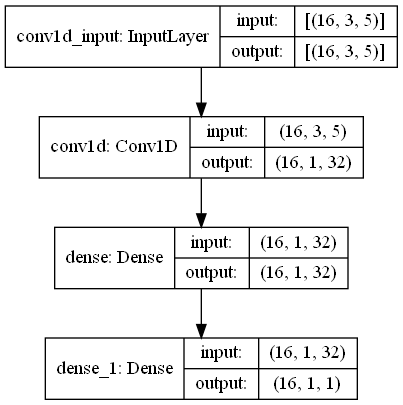

In [59]:
conv_model.summary()

from keras.utils import plot_model
plot_model(conv_model, to_file='model.png',
               show_shapes=True,
 #   show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)



In [ ]:
train_df_0_tot = crv_0
train_df_1_tot = crv_1
train_df_2_tot = crv_2
train_df_3_tot = crv_3

# Start

---------------------------------------------------------------------------------
### progressive fitting



In [ ]:
def add_curve(curve=None, window = None, window_t=None,
              model=None, npat= 2, num_epoch = 20, add_num=0,  df_name=None ) :

    train_loss = []
    val_loss = []
    train_mae = []
    val_mae = []

    #for i in range(0,(3-add_num)) :
    for i in range(0, 3):
        plots_t.MAX_EPOCHS = num_epoch + 10*i
#        MAX_EPOCHS = 20 + 10*i
        train_df = curve.iloc[i]['tr']
        val_df = curve.iloc[i]['va']
        #val_df = curve.iloc[i]['tr']
        test_df = curve.iloc[i]['te']

        #print(f'****** i =   {i}')

        window.train_df = train_df
        window.val_df = val_df
        window.test_df = test_df

        if i >= add_num :
            history = fit_model(conv_model, conv_window, epochs_num=num_epoch, verb=0, stop=[])

            train_loss += history.history['loss'][-1:]
            if 'val_loss' in history.history:
                print("val_loss not in the list")
                val_loss += history.history['val_loss'][-1:]

            train_mae += history.history['mean_absolute_error'][-1:]
            if 'val_mean_absolute_error' in history.history:
                print("val_mean_absolute_error not in the list")
                val_mae += history.history['val_mean_absolute_error'][-1:]

            eval(history.history)

            window_t.train_df = train_df
            window_t.val_df = val_df
            window_t.test_df = test_df

            #window_t.plot_batch(model, dset_name='train', n_batch=10 )
            window_t.plot_xy(model, n_batch=30)

            subplot_title = (df_name+str(i))
            plt.gca().set_title(subplot_title)

            #plt.text(0.9, 0.1, "subtitle".format(subplot_title))
            #plt.gca().text(0.9, 0.1,  subplot_title)


    #    window_t.plot_batch(model, dset_name='val', n_batch=10, figures=0)

#    window_t.plot_batch(model, dset_name='test', n_batch=10, figures=0)

    train_loss = [x/4 for x in train_loss]
    val_loss = [x/4 for x in val_loss]
    train_mae = [x/4 for x in train_mae]
    val_mae = [x/4 for x in val_mae]

  #  return train_loss, val_loss, train_mae, val_mae
    return history.history

In [ ]:
def eval(hist) :
 #   fig, loss_ax = plt.subplots(figsize =(5,3.5))
    fig, loss_ax = plt.subplots( figsize =(5,3))
    acc_ax = loss_ax.twinx()
    loss_ax.plot(hist['loss'], 'y', label='train loss')
    if 'val_loss' in hist:
        loss_ax.plot(hist['val_loss'], 'r', label='val loss')

    acc_ax.plot(hist['mean_absolute_error'], 'b', label='train MAE')
    if 'val_mean_absolute_error' in hist:
        acc_ax.plot(hist['val_mean_absolute_error'], 'g', label='val MAE')

    loss_ax.set_xlabel('epoch', fontsize=14)
#    loss_ax.set_xlabel('epoch', fontsize=10)
    loss_ax.set_ylabel('loss', fontsize=15)
    acc_ax.set_ylabel('mean_absolute_error', fontsize=12)

    #acc_ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3e'))
    #loss_ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3e'))
    acc_ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    loss_ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

    loss_ax.tick_params (axis = 'x', labelsize = 15)
    loss_ax.tick_params (axis = 'y', labelsize = 15)


    #loss_ax.legend(loc='best')
    loss_ax.legend(loc='upper left',fontsize=10)
    acc_ax.legend(loc='upper right',fontsize=10)
    #loss_ax.legend(loc='center')
    #acc_ax.legend(loc='lower center')
    plt.gcf().tight_layout()


In [ ]:
conv_model = get_compiled_model()

In [ ]:
tr_loss_con = []
va_loss_con= []
tr_mae_con = []
va_mae_con = []

### Curve1

In [ ]:
history = add_curve(curve=ttt_1, window=conv_window,
            window_t=conv_window_t, model=conv_model, npat= 50,
                      num_epoch=100, add_num=0, df_name='temp')
        #     window_t=conv_window_t, model=conv_model, npat= 10, num_epoch=100 )
print(f'End of curve1 -----------------')

In [ ]:
plot_val3_con(conv_model, conv_window_t)

In [ ]:
#plot_val_con(conv_model, conv_window_t)

In [ ]:
conv_model.save("conv_02/c1_01k")
np.save('conv_02/c1_01k.npy', history)

In [ ]:
#conv_model.evaluate(conv_window.val)

In [ ]:
conv_model = tf.keras.models.load_model("conv_02/c1_01k")
#history=np.load('conv_02/c1_01k.npy',allow_pickle='TRUE').item()

##### training for train and val

In [ ]:
train_df = pd.concat ([train_df_12,val_df_12], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_12
conv_window.test_df = test_df_12

history = fit_model(conv_model, conv_window, epochs_num=100, verb=0, stop=[])

#eval(history.history)
#plot_val_con(conv_model, conv_window_t)
plot_val3_con(conv_model, conv_window_t)

In [ ]:
conv_model.save("conv_02/c1_all")
np.save('conv_02/c1_all.npy', history.history)

In [ ]:
conv_model = tf.keras.models.load_model("conv_02/c1_all")
#history=np.load('conv_02/c1_01k.npy',allow_pickle='TRUE').item()

### + Curve0

In [ ]:
conv_model = tf.keras.models.load_model("conv_02/c1_all")

history = add_curve(curve=ttt, window=conv_window,
            window_t=conv_window_t, model=conv_model, npat= 50,
                      num_epoch=100, add_num=0, df_name='temp')
        #     window_t=conv_window_t, model=conv_model, npat= 10, num_epoch=100 )
print(f'End of curve1 -----------------')

In [ ]:
plot_val3_con(conv_model, conv_window_t)

In [ ]:
#plot_val_con(conv_model, conv_window_t)

In [ ]:
conv_model.save("conv_02/c1_0")
np.save('conv_02/c1_0.npy', history)

In [ ]:
#conv_model.evaluate(conv_window.val)

##### training for train and val

In [ ]:
train_df = pd.concat ([train_df_02,val_df_02], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_02
conv_window.test_df = test_df_02

history = fit_model(conv_model, conv_window, epochs_num=100, verb=0, stop=[])

#eval(history.history)
#plot_val_con(conv_model, conv_window_t)
plot_val3_con(conv_model, conv_window_t)

In [ ]:
conv_model.save("conv_02/c1_0all")
np.save('conv_02/c1_0all.npy', history.history)



### + Curve3

In [ ]:
conv_model = tf.keras.models.load_model("conv_02/c1_0all")


history = add_curve(curve=ttt_3, window=conv_window,
            window_t=conv_window_t, model=conv_model, npat= 50,
                      num_epoch=100, add_num=0, df_name='temp')
        #     window_t=conv_window_t, model=conv_model, npat= 10, num_epoch=100 )
print(f'End of curve1 -----------------')

In [ ]:
plot_val3_con(conv_model, conv_window_t)

In [ ]:
#plot_val_con(conv_model, conv_window_t)

In [ ]:
conv_model.save("conv_02/c1_0_3")
np.save('conv_02/c1_0_3.npy', history)

In [ ]:
#conv_model.evaluate(conv_window.val)

##### training for train and val

In [ ]:
train_df = pd.concat ([train_df_32,val_df_32], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_32
conv_window.test_df = test_df_32

history = fit_model(conv_model, conv_window, epochs_num=100, verb=0, stop=[])

#eval(history.history)
#plot_val_con(conv_model, conv_window_t)
plot_val3_con(conv_model, conv_window_t)

In [ ]:
conv_model.save("conv_02/c1_0_3all")
np.save('conv_02/c1_0_3all.npy', history.history)

### repeated adjustment
#### curve0, 1 and 3

#### + curve ?

In [ ]:
conv_model = tf.keras.models.load_model("conv_02/c1_0_3all")

train_df = pd.concat ([train_df_02,val_df_02], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_02
conv_window.test_df = test_df_02

history = fit_model(conv_model, conv_window, epochs_num=50, verb=0, stop=[])

#eval(history.history)
#plot_val_con(conv_model, conv_window_t)
plot_val3_con(conv_model, conv_window_t)

In [ ]:
train_df = pd.concat ([train_df_32,val_df_32], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_32
conv_window.test_df = test_df_32

history = fit_model(conv_model, conv_window, epochs_num=20, verb=0, stop=[])

#eval(history.history)
#plot_val_con(conv_model, conv_window_t)
plot_val3_con(conv_model, conv_window_t)

In [ ]:
train_df = pd.concat ([train_df_12,val_df_12], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_12
conv_window.test_df = test_df_12

history = fit_model(conv_model, conv_window, epochs_num=20, verb=0, stop=[])

#eval(history.history)
#plot_val_con(conv_model, conv_window_t)
plot_val3_con(conv_model, conv_window_t)

In [ ]:
train_df = pd.concat ([train_df_32,val_df_32], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_32
conv_window.test_df = test_df_32

history = fit_model(conv_model, conv_window, epochs_num=20, verb=0, stop=[])

#eval(history.history)
#plot_val_con(conv_model, conv_window_t)
plot_val3_con(conv_model, conv_window_t)

In [ ]:
train_df = pd.concat ([train_df_12,val_df_12], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_12
conv_window.test_df = test_df_12

history = fit_model(conv_model, conv_window, epochs_num=10, verb=0, stop=[])

#eval(history.history)
#plot_val_con(conv_model, conv_window_t)
plot_val3_con(conv_model, conv_window_t)

In [ ]:
train_df = pd.concat ([train_df_02,val_df_02], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_02
conv_window.test_df = test_df_02

history = fit_model(conv_model, conv_window, epochs_num=20, verb=0, stop=[])

#eval(history.history)
#plot_val_con(conv_model, conv_window_t)
plot_val3_con(conv_model, conv_window_t)

In [ ]:
train_df = pd.concat ([train_df_32,val_df_32], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_32
conv_window.test_df = test_df_32

history = fit_model(conv_model, conv_window, epochs_num=20, verb=0, stop=[])

#eval(history.history)
#plot_val_con(conv_model, conv_window_t)
plot_val3_con(conv_model, conv_window_t)

In [ ]:
train_df = pd.concat ([train_df_12,val_df_12], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_12
conv_window.test_df = test_df_12

history = fit_model(conv_model, conv_window, epochs_num=10, verb=0, stop=[])

#eval(history.history)
#plot_val_con(conv_model, conv_window_t)
plot_val3_con(conv_model, conv_window_t)

In [ ]:
train_df = pd.concat ([train_df_02,val_df_02], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_02
conv_window.test_df = test_df_02

history = fit_model(conv_model, conv_window, epochs_num=10, verb=0, stop=[])

#eval(history.history)
#plot_val_con(conv_model, conv_window_t)
plot_val3_con(conv_model, conv_window_t)

In [ ]:
train_df = pd.concat ([train_df_32,val_df_32], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_32
conv_window.test_df = test_df_32

history = fit_model(conv_model, conv_window, epochs_num=20, verb=0, stop=[])

#eval(history.history)
#plot_val_con(conv_model, conv_window_t)
plot_val3_con(conv_model, conv_window_t)

In [ ]:
conv_model.save("conv_02/c103_1_etc")
np.save('conv_02/c103_1_etc.npy', history.history)

In [ ]:
#batch_plot(curv0=([train_df_10, val_df_10, '1']), model=conv_model, window_t=conv_window_t )
#batch_plot (curv = ([train_df_00, val_df_00, '0'],  [train_df_10, val_df_10, '1'] ))
batch_plot(curv0 = [train_df_02, val_df_02, '0'] , model=conv_model, window_t=conv_window_t)

In [ ]:
conv_model = tf.keras.models.load_model("conv_02/c103_1_etc")

batch_plot (curv = ([train_df_02, val_df_02, '0'],  [train_df_12, val_df_12, '1'],
              [train_df_32, val_df_32, '3'],[test_df_20, test_df_20, '2'])
            ,model=conv_model, window_t=conv_window_t)











### wide conv_window
- effect - may be nothing but the widening the view scale
- Conv_width effect when other than 3 ---- ???

In [67]:
LABEL_WIDTH = 8
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = Class_t.WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_conv_window

Total window size: 11
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [ 3  4  5  6  7  8  9 10]
Label column name(s): ['FlowHt']

In [69]:
conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['FlowHt']

In [68]:
wide_conv_window_t = Class_t.WinGen(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_conv_window_t

print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (16, 10, 5)
Labels shape: (16, 8, 1)
Output shape: (16, 8, 1)


In [77]:
n=1
for example_inputs, example_labels in wide_conv_window.train.take(10): #1534, 6
#for example_inputs, example_labels in single_step_window.train.take(3):
#for example_inputs, example_labels in wide_window.train.take(2000): #1533 15
  print(n)
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')
  n += 1

1
Inputs shape (batch, time, features): (16, 10, 5)
Labels shape (batch, time, features): (16, 8, 1)
2
Inputs shape (batch, time, features): (4, 10, 5)
Labels shape (batch, time, features): (4, 8, 1)


이제 더 넓은 창에 모델의 예측값을 플롯할 수 있습니다. 첫 번째 예측 전 3개의 입력 타임스텝에 주목하세요. 여기서 모든 예측은 이전 3개의 타임스텝에 기초합니다.

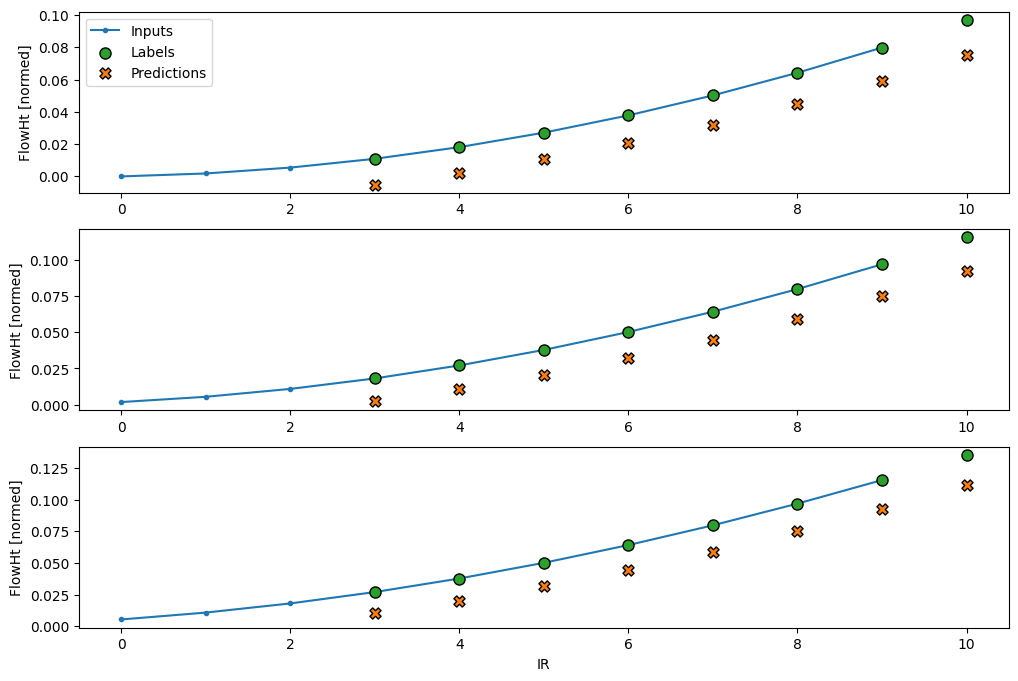

In [78]:
wide_conv_window.plot(conv_model)

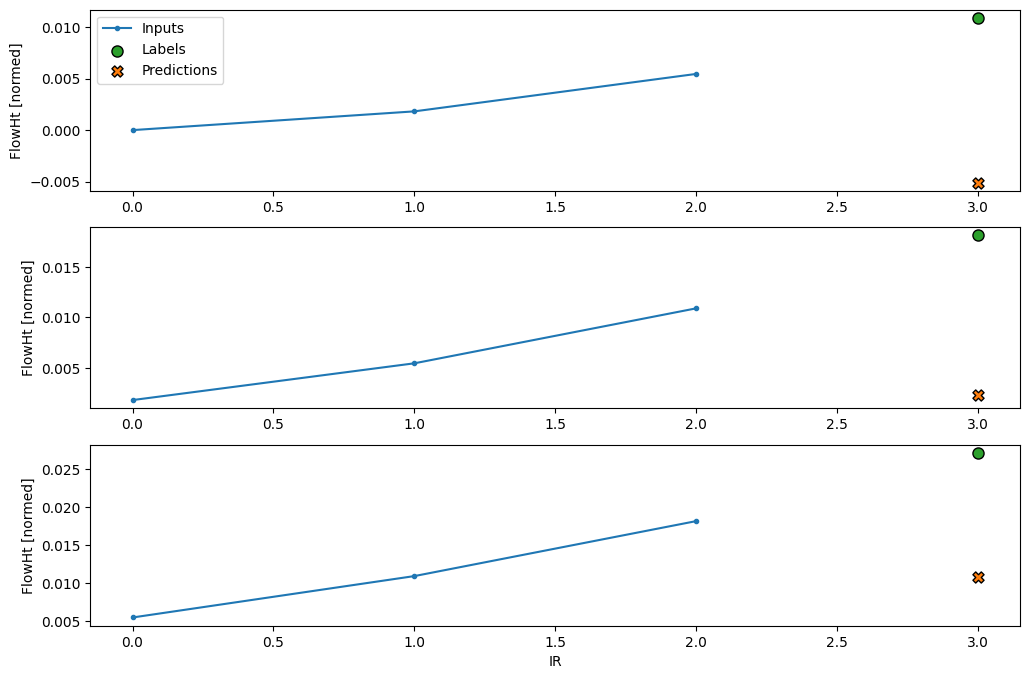

In [79]:
conv_window.plot(conv_model)


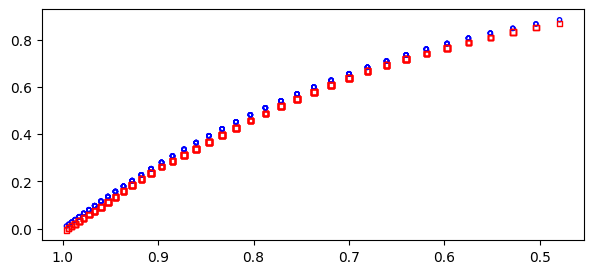

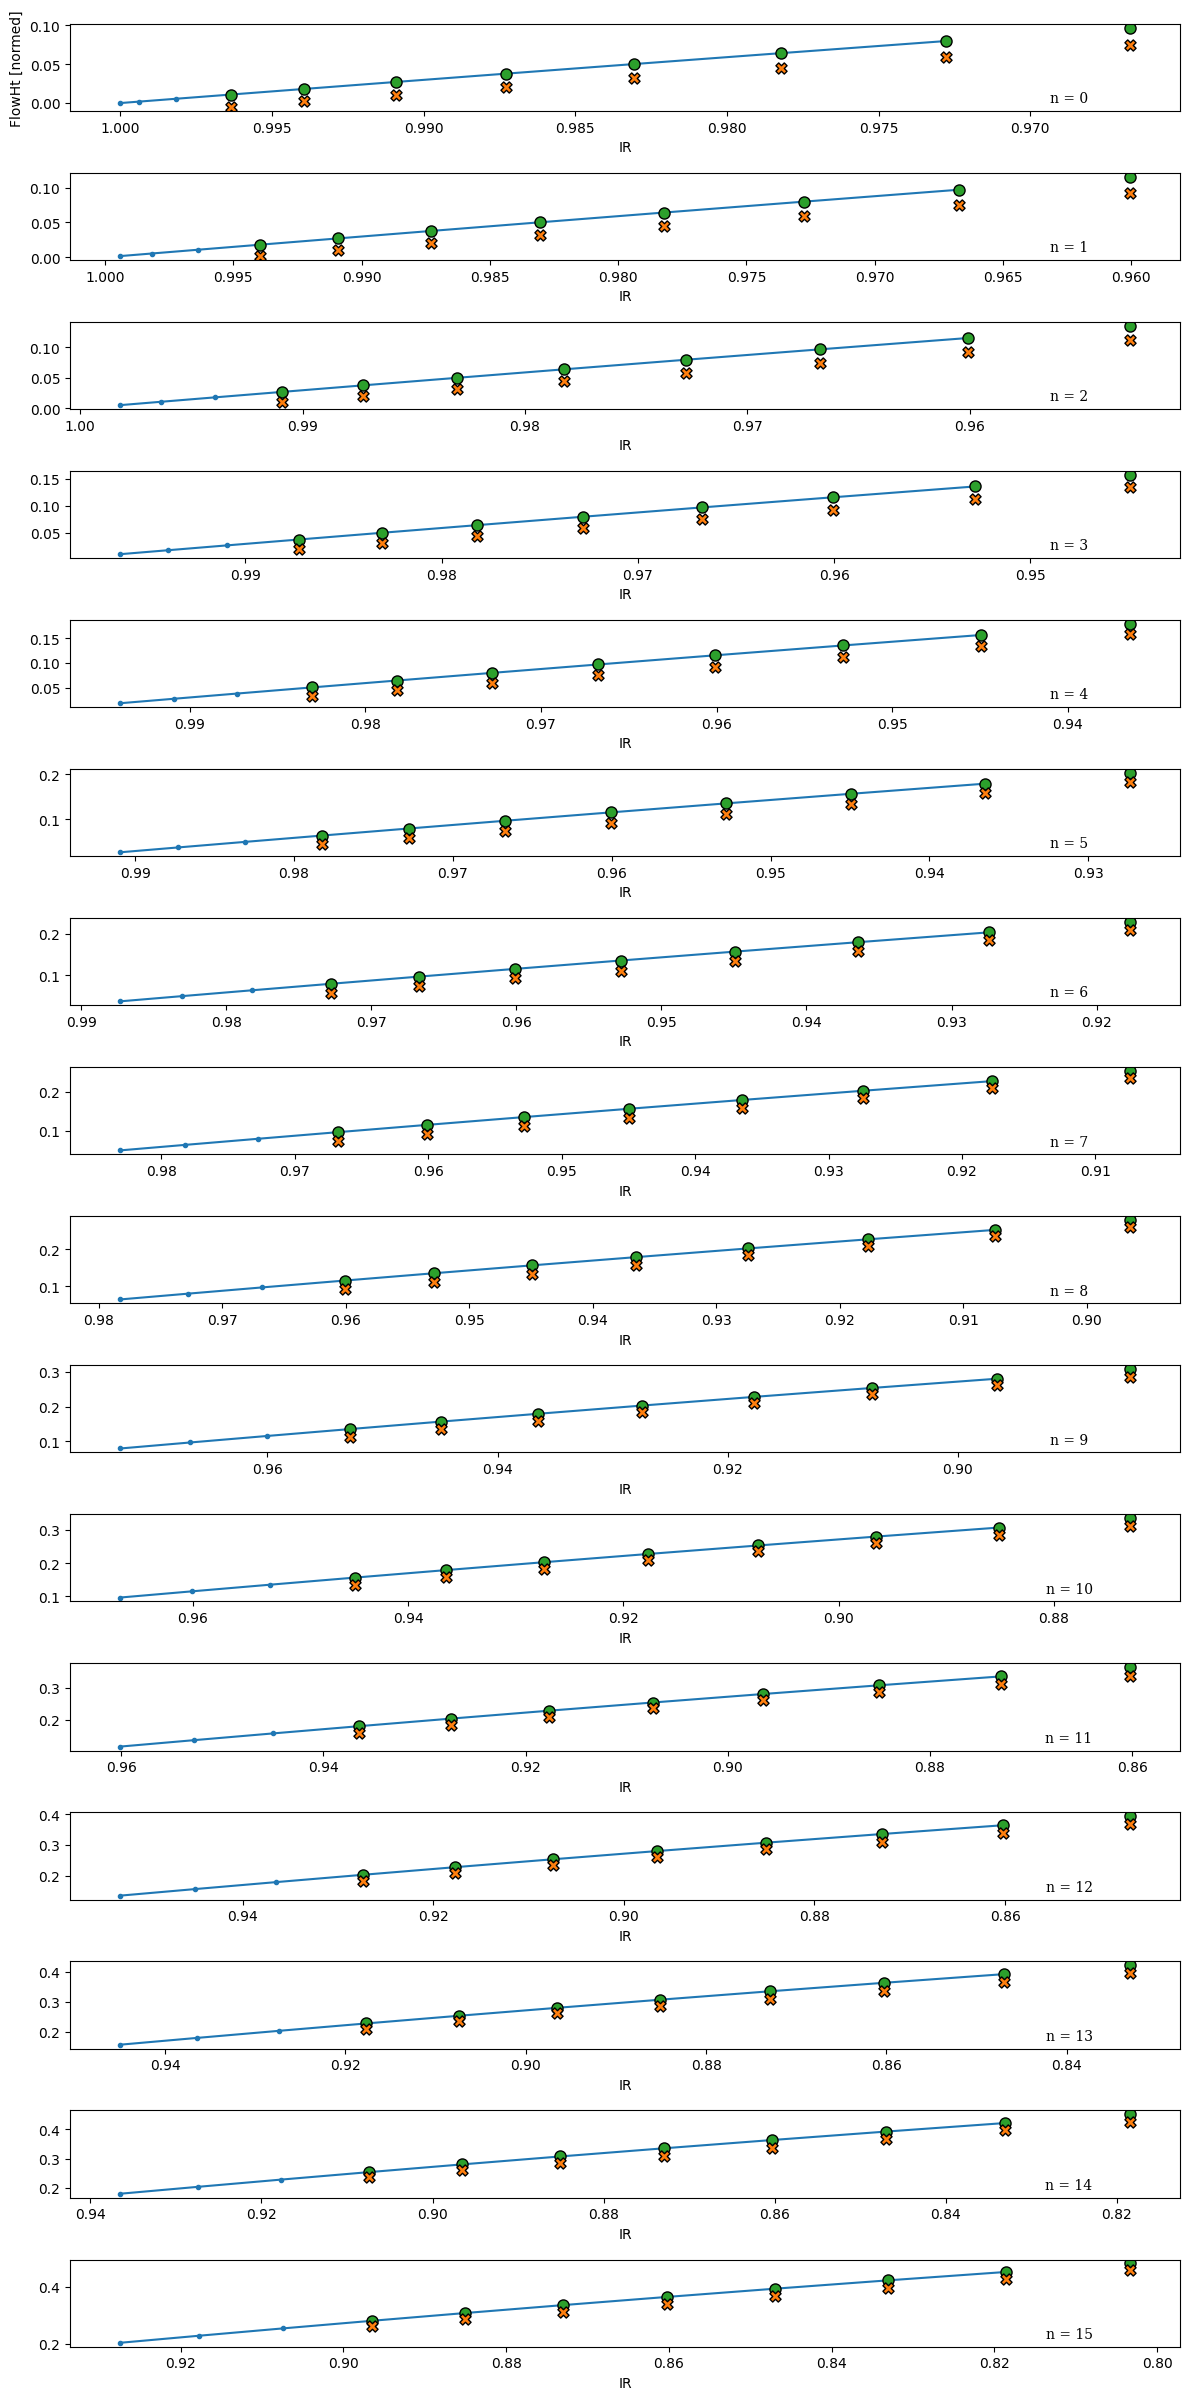

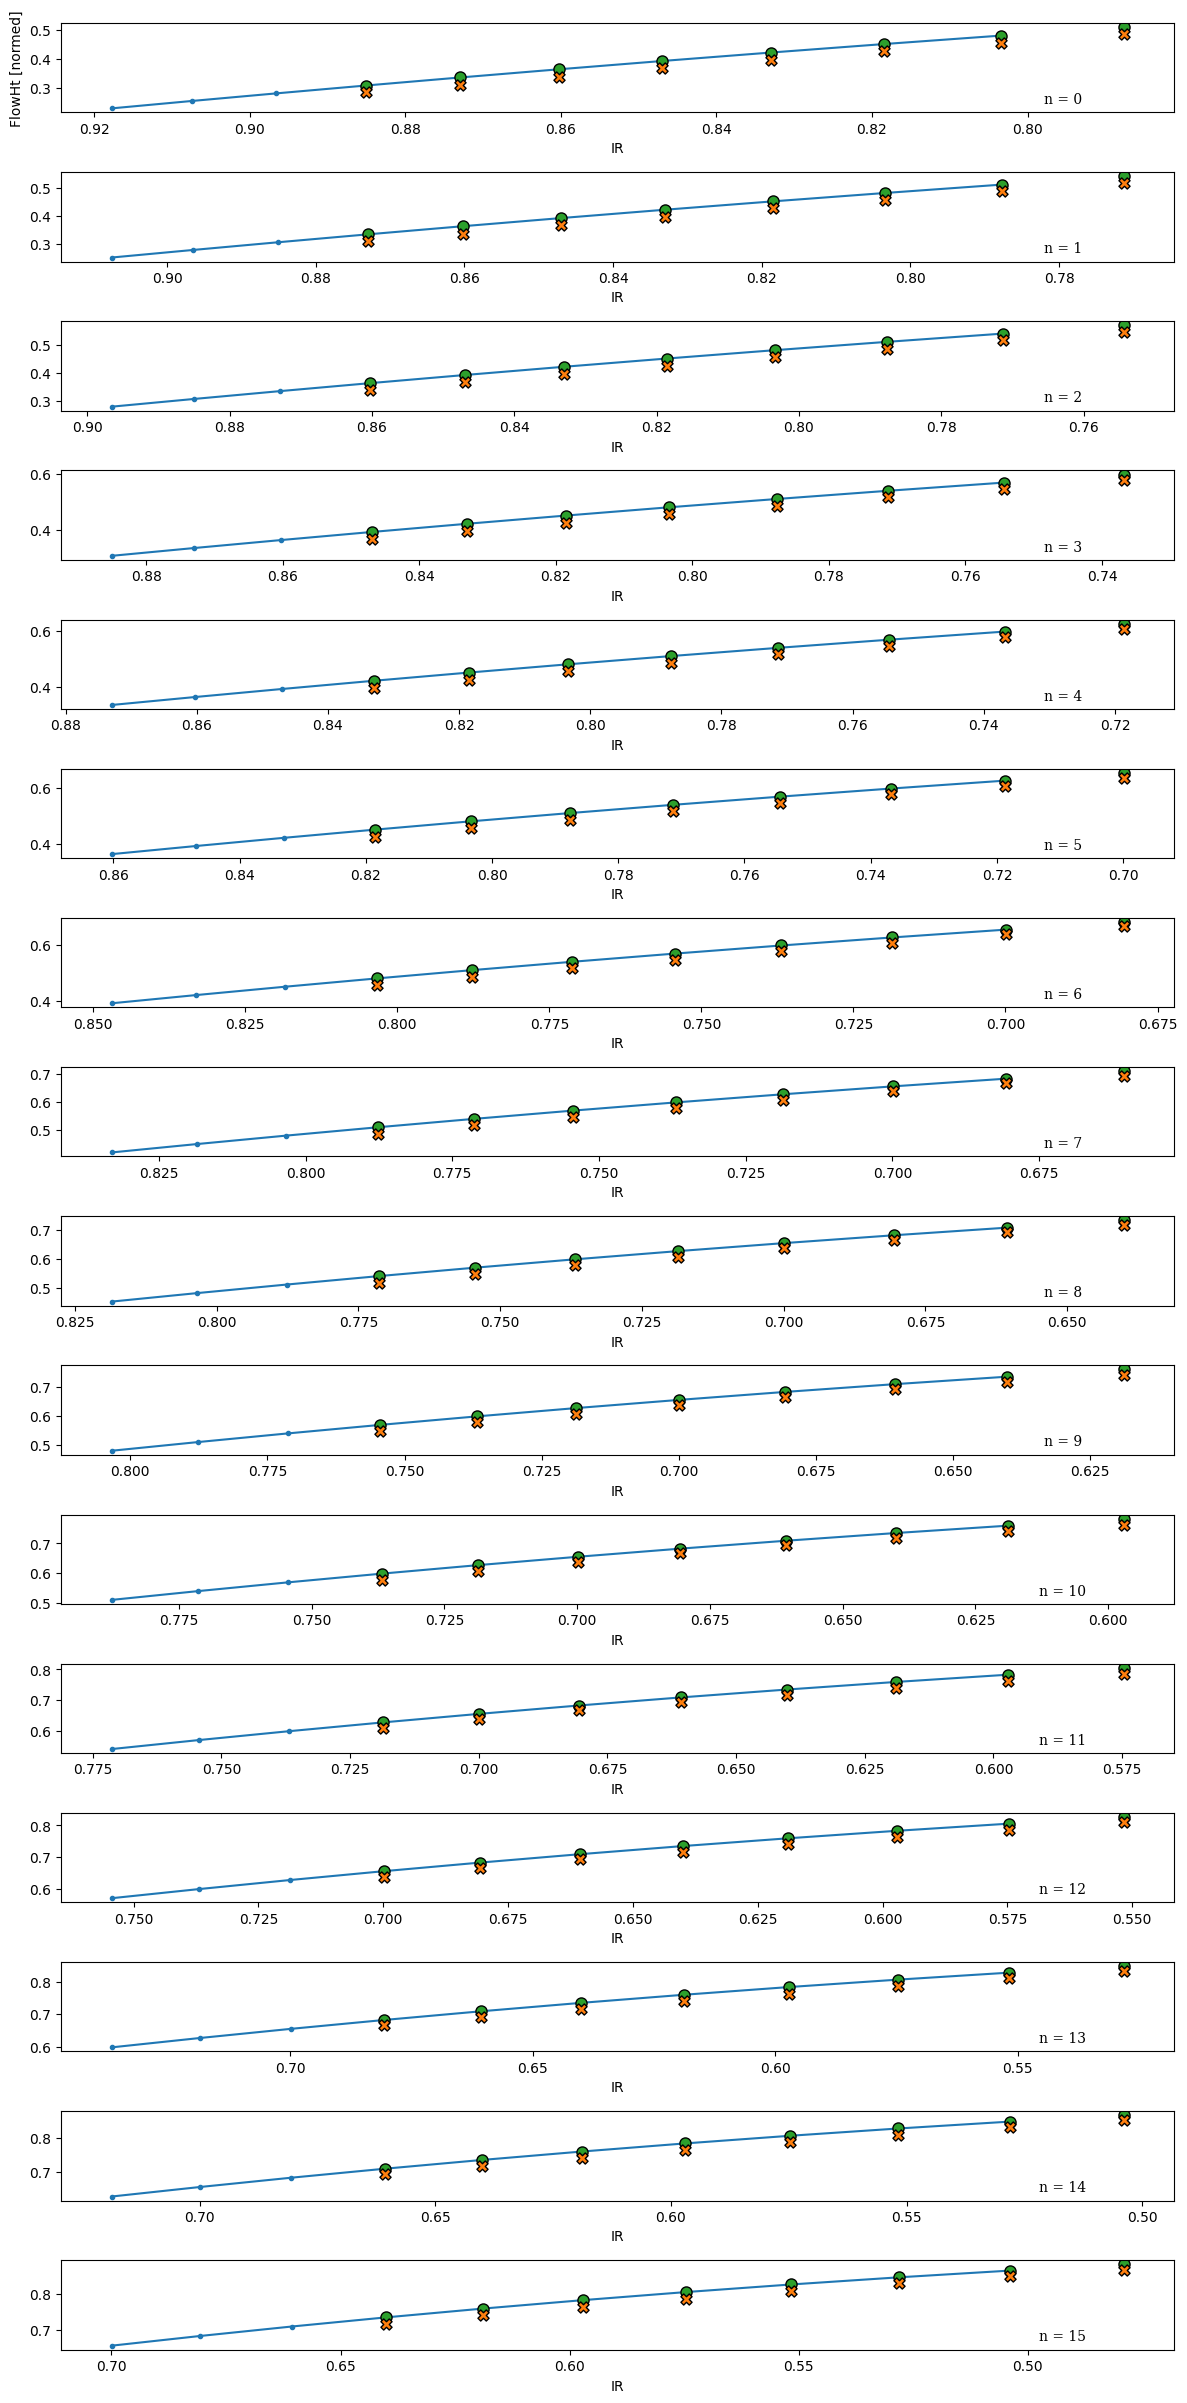

In [82]:
    wide_conv_window_t.train_df = train_df_02
    wide_conv_window_t.val_df = val_df_02
    wide_conv_window_t.test_df = test_df_02
    wide_conv_window_t.plot_batch(conv_model,n_batch = 1, figures='True')

#(self, model=None, dset_name=None, plot_col='FlowHt', max_subplots=40, n_batch=None,
#               figures=None, xy_fig=None)

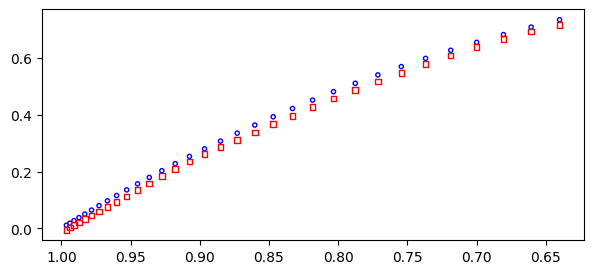

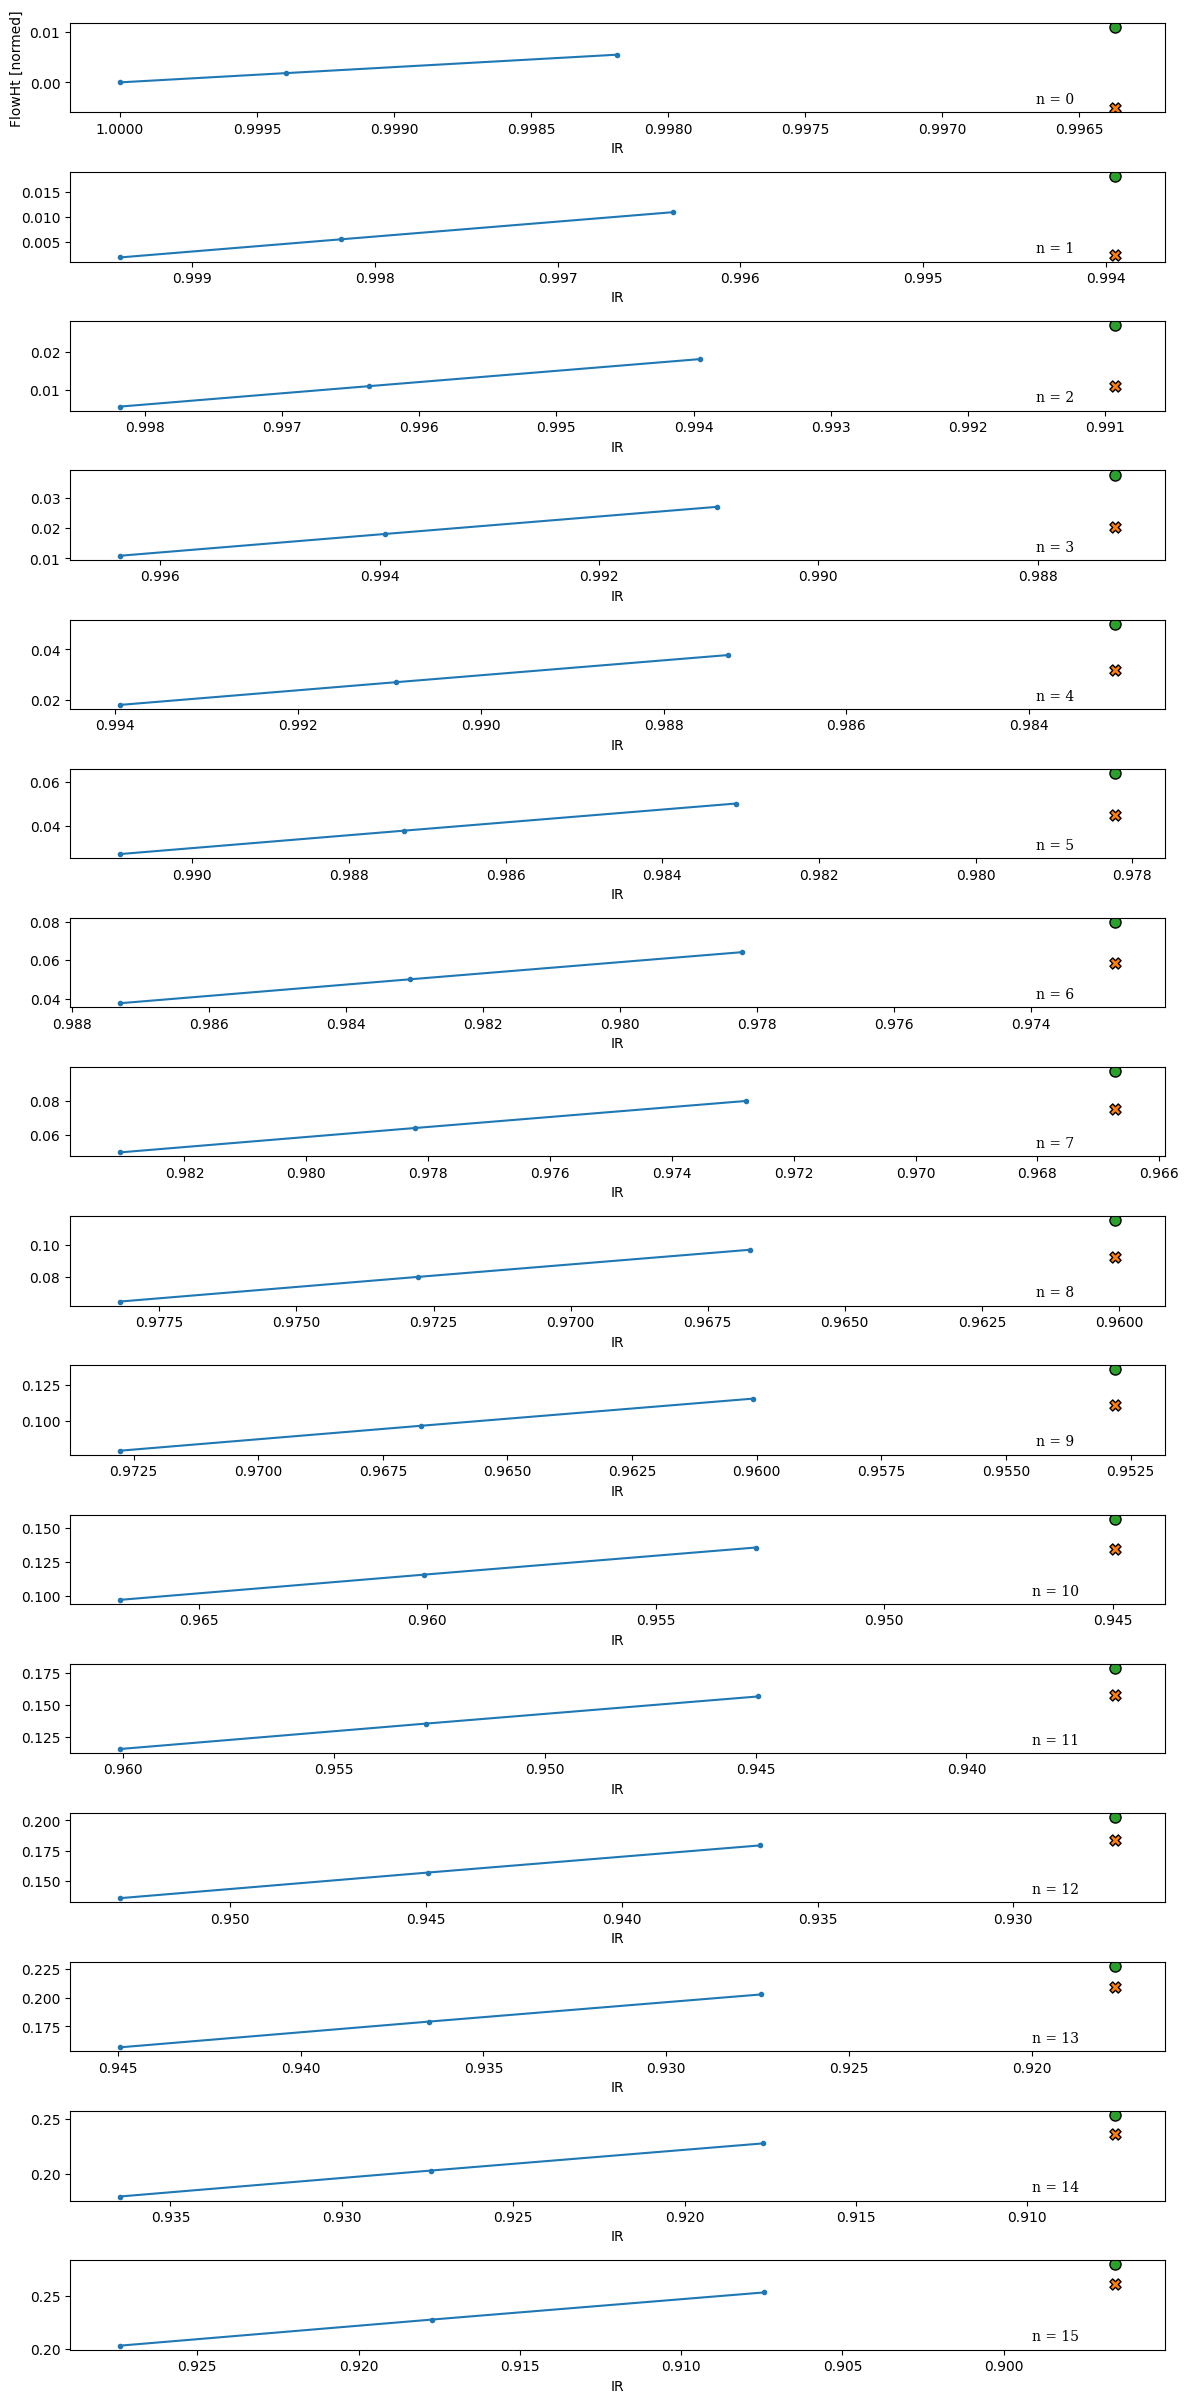

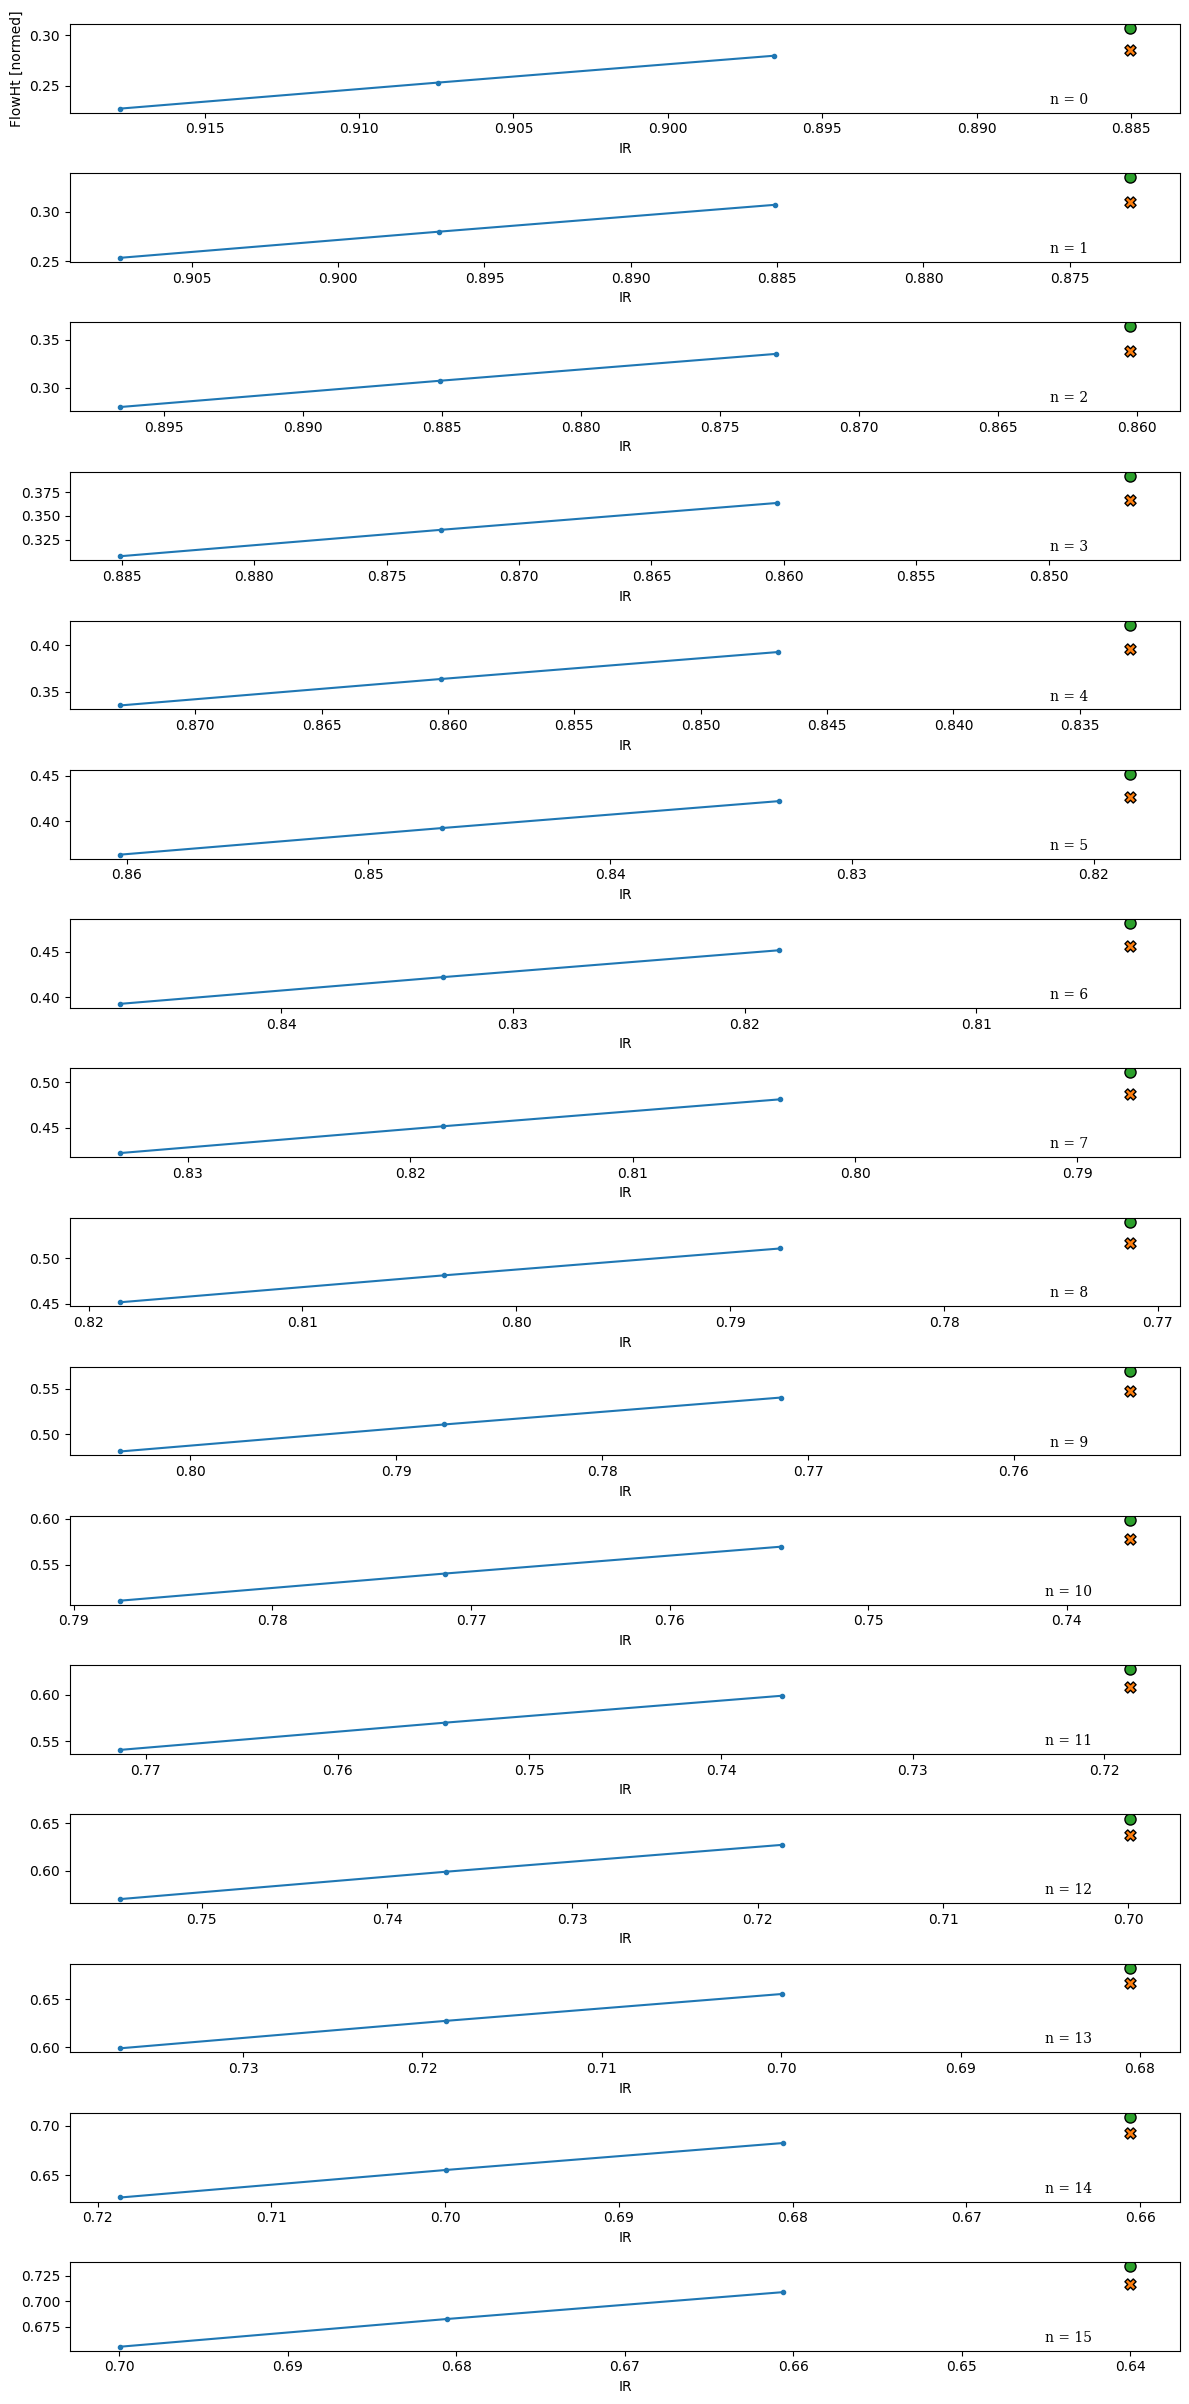

In [95]:
    conv_window_t.train_df = train_df_02
    conv_window_t.val_df = val_df_02
    conv_window_t.test_df = test_df_02
    conv_window_t.plot_batch(conv_model,n_batch = 1, figures='True')

Text(0.5, 1.0, 'Curve 0')

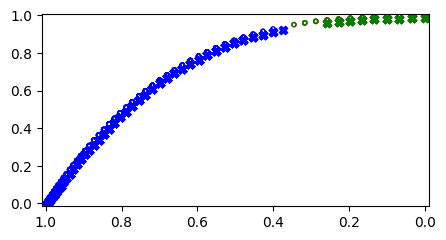

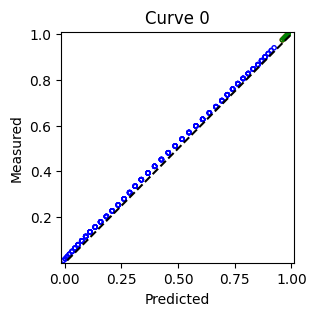

In [83]:
    wide_conv_window_t.train_df = ttt.iloc[2]['tr']
    wide_conv_window_t.val_df = ttt.iloc[2]['va']
    wide_conv_window_t.test_df = ttt.iloc[2]['te']

    wide_conv_window_t.plot_xy(conv_model,  n_batch=20 )
    plt.gca().set_title('Curve 0')

Text(0.5, 1.0, 'Curve 0')

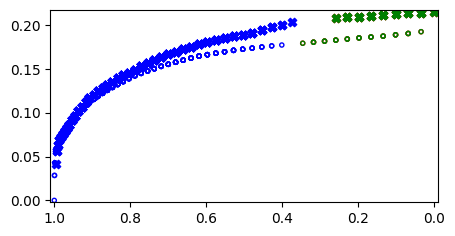

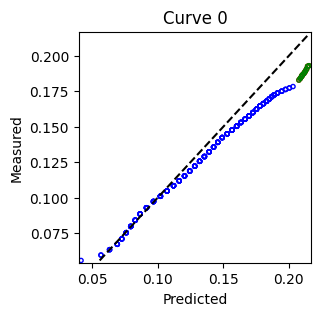

In [84]:
    wide_conv_window_t.train_df = ttt_1.iloc[2]['tr']
    wide_conv_window_t.val_df = ttt_1.iloc[2]['va']
    wide_conv_window_t.test_df = ttt_1.iloc[2]['te']

    wide_conv_window_t.plot_xy(conv_model,  n_batch=20 )
    plt.gca().set_title('Curve 0')

Text(0.5, 1.0, 'Curve 0')

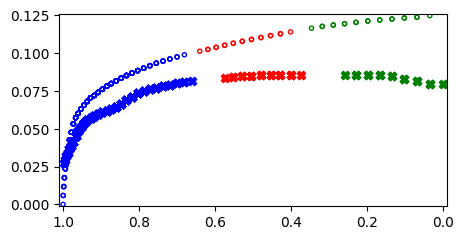

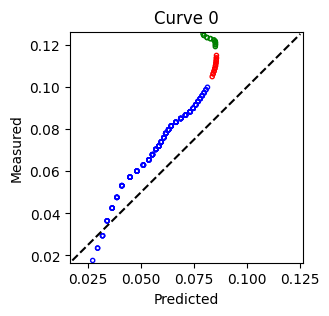

In [85]:
    wide_conv_window_t.train_df = ttt_2.iloc[2]['tr']
    wide_conv_window_t.val_df = ttt_2.iloc[2]['va']
    wide_conv_window_t.test_df = ttt_2.iloc[2]['te']

    wide_conv_window_t.plot_xy(conv_model,  n_batch=20 )
    plt.gca().set_title('Curve 0')

Text(0.5, 1.0, 'Curve 0')

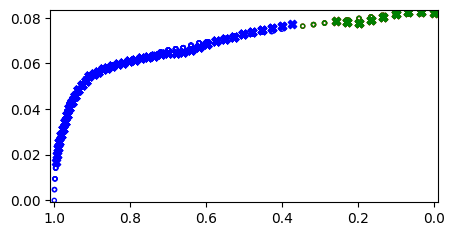

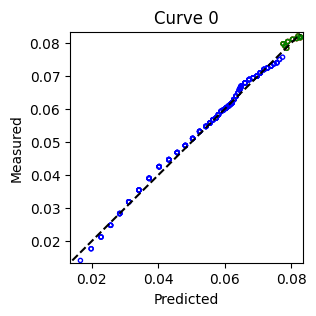

In [86]:
    wide_conv_window_t.train_df = ttt_3.iloc[2]['tr']
    wide_conv_window_t.val_df = ttt_3.iloc[2]['va']
    wide_conv_window_t.test_df = ttt_3.iloc[2]['te']

    wide_conv_window_t.plot_xy(conv_model,  n_batch=20 )
    plt.gca().set_title('Curve 0')



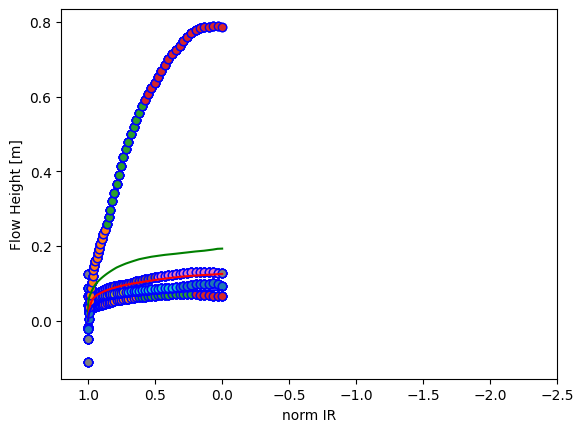

In [90]:
# curve 4
crv_4 = curve_4.copy()

m = len(crv_4)

#train_df_4 = crv_4[0:int(m*0.5)]
#train_df_4 = crv_4[0:int(m*0.25)]
#val_df_4 = crv_4[0:int(m*0.25)]

#train_df_4 = crv_4[ :int(m*1.00)]
train_df_4 = crv_4[ :int(m*1.00)]

#train_df_4 = crv_4[int(m*0.25):int(m*0.5)]
val_df_4 = train_df_4

wide_conv_window_t.train_df = train_df_4
wide_conv_window_t.val_df = val_df_4
wide_conv_window_t.test_df = val_df_4

#wide_conv_window_t.plot_xy(conv_model,  n_batch=20 )
#plt.gca().set_title('Curve4')


dataset = wide_conv_window_t.train

fig, ax2 = plt.subplots()

for i, batch in enumerate(dataset) :
  inputs, targets, lab = batch
  predictions = conv_model(inputs)
#  print(f'Inputs shape (batch, time, features): {inputs.shape}')
#  print(f'Labels shape (batch, time, features): {targets.shape}')
 # ax2.scatter(lab[:,:,0], targets[:,:,0])
#  ax2.scatter(lab[:,:,0], predictions[:,:,0], marker='o', facecolors='none'
  ax2.scatter(lab[:,:,0], predictions[:,:,0], marker='o'
              , edgecolor ='b')


ax2.set_xlabel('norm IR')
ax2.set_ylabel('Flow Height [m]')
#ax2.set_xlim([plt.xlim()[1], -2.5])
ax2.set_xlim([1.2, -2.5])

ax2.plot(curve_1.iloc[0:58,0], curve_1.iloc[0:58,1], 'g-',
        curve_2.iloc[0:58,0], curve_2.iloc[0:58,1], 'r-',
        curve_3.iloc[0:58,0], curve_3.iloc[0:58,1], 'b-',)
#         curve_0.iloc[0:58,0], curve_0.iloc[0:58,1], 'm-')

wide_conv_window_t.train_df = ttt_3.iloc[2]['tr']
    #.append(ttt_3.iloc[2]['va'])
                        #    .append(ttt_3.iloc[2]['te'])


In [91]:
df3 = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "anycurve.csv") )
#df2 = pd.read_csv(
#    os.path.join(mglearn.datasets.DATA_PATH, "constant(val).csv") )
# 예제를 위해 몇개의 열만 선택합니다
#df = df[['IR', 'FlowHt', 'Const', 'Var', 'Base', 'MixS75','MixS50','MixS25']]
#df = df[['IR', 'FlowHt', 'Sand','Ash','delIR','delFlow']]
df3 = df3[['IR', 'FlowHt', 'Sand','Ash','delIR','delFlow']]
#df2 = df2[['IR', 'FlowHt', 'Sand','Ash']]
df3['delIF'] = df3['delFlow']/df3['delIR']*-1

df3['delIF']=df3['delIF'].replace(np.nan, 0)
df3 = df3[['IR', 'FlowHt', 'Sand','Ash' ]]

display(df3.head())
#display(df2.head())

,IR,FlowHt,Sand,Ash
0,1.0000,0.0,1.0,0.0
1,0.9995,0.1,1.0,0.0
2,0.9985,0.2,1.0,0.0
3,0.9970,2.0,1.0,0.0
4,0.9950,3.8,1.0,0.0


,IR,FlowHt,Sand,Ash
count,2.320000e+02,2.320000e+02,2.320000e+02,2.320000e+02
mean,-8.805217e-16,3.062684e-16,1.837611e-16,-1.837611e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.174275e+00,-1.142457e+00,-1.338746e+00,-1.338746e+00
25%,-7.672155e-01,-6.861639e-01,-6.693731e-01,-6.693731e-01
50%,2.786256e-01,-1.943157e-01,0.000000e+00,0.000000e+00
75%,9.065283e-01,2.312292e-01,6.693731e-01,6.693731e-01
max,1.115497e+00,3.399864e+00,1.338746e+00,1.338746e+00


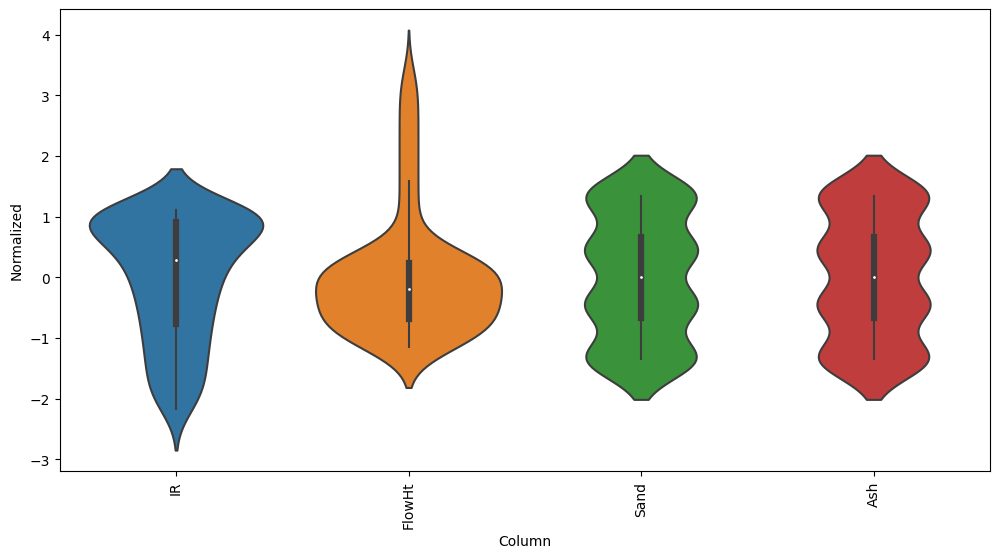

In [92]:
df3_mean = df3.mean()
df3_std = df3.std()
df3_std_s = (df3 - df3_mean) / df3_std
df3_std_m = df3_std_s.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df3_std_m)
_ = ax.set_xticklabels(df3.keys(), rotation=90)
df3_std_s.describe()

InvalidArgumentError: input depth must be evenly divisible by filter depth: 4 vs 5 [Op:Conv2D]

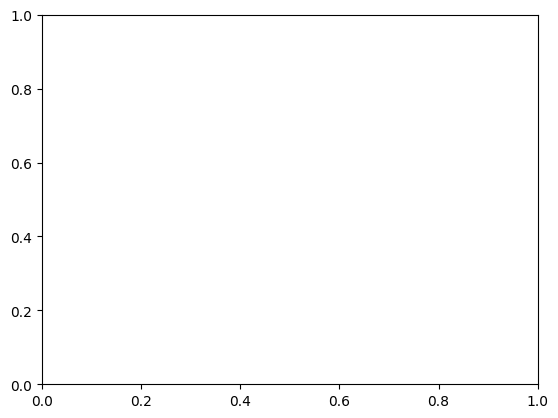

In [93]:
df3_org = df3
df3 = df3_std_s

#a =ttt_1.iloc[2]['tr']
#b=a.append(ttt_1.iloc[2]['va'])
#c = b.append(ttt_1.iloc[2]['te'])
n = len(df3)
c_0 = df3[0:int(n*0.25)].copy()
c_1 = df3[int(n*0.25):int(n*0.5)].copy()
c_2 = df3[int(n*0.5):int(n*0.75)].copy()
c_3 = df3[int(n*0.75):int(n)].copy()


wide_conv_window_t.train_df = c_2

dataset = wide_conv_window_t.train
fig, ax2 = plt.subplots()

for i, batch in enumerate(dataset) :
  inputs, targets, lab = batch
  predictions = conv_model(inputs)
  ax2.scatter(lab[:,:,0], predictions[:,:,0], marker='o', edgecolor ='b')
ax2.set_xlim([1.2, -2.5])

ax2.plot(curve_1.iloc[0:58,0], curve_1.iloc[0:58,1], 'g-',
        curve_2.iloc[0:58,0], curve_2.iloc[0:58,1], 'r-',
        curve_3.iloc[0:58,0], curve_3.iloc[0:58,1], 'b-',
        curve_0.iloc[0:58,0], curve_0.iloc[0:58,1], 'm-',)

ax2.plot(c_1.iloc[0:58,0], c_1.iloc[0:58,1], 'g--',
        c_2.iloc[0:58,0], c_2.iloc[0:58,1], 'r--',
        c_3.iloc[0:58,0], c_3.iloc[0:58,1], 'b--',
        c_0.iloc[0:58,0], c_0.iloc[0:58,1], 'm--',)









in split_window : Tensor("strided_slice:0", shape=(None, None, 4), dtype=float32)
in split_window : Tensor("stack:0", shape=(1, None, None), dtype=float32)


InvalidArgumentError: input depth must be evenly divisible by filter depth: 4 vs 5 [Op:Conv2D]

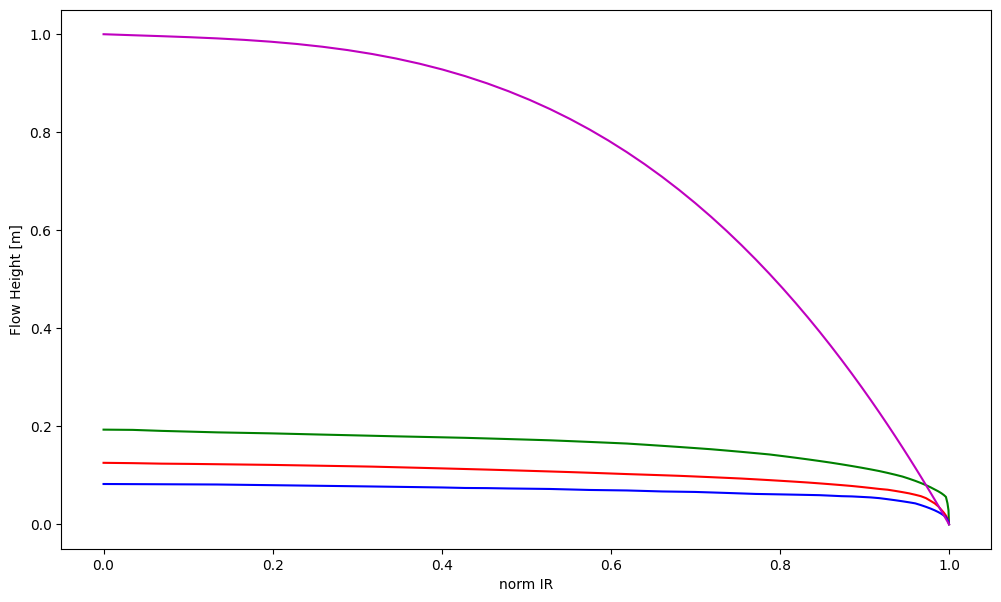

In [94]:
fig, ax2 = plt.subplots(figsize = (12,7))

#------------------------------------------
train_df_3 = curve_3.copy()
#plots_t.plot_all(train_df_3, set_name='3 s25a75',   model=conv_model,window_t=conv_window_t,marker2='o' , edgecolor2 ='b')

#------------------------------------------
train_df_2 = curve_2.copy()
#plots_t.plot_all(train_df_2, set_name='2 s50a50',   model=conv_model,window_t=conv_window_t,marker2='o' , edgecolor2 ='g')
#------------------------------------------
train_df_1 = curve_1.copy()
#plots_t.plot_all(train_df_1, set_name='1 s75a25',  model=conv_model,window_t=conv_window_t, marker2='o' , edgecolor2 ='g')

#------------------------------------------

train_df_0 = curve_0.copy()
#plots_t.plot_all(train_df_0, set_name='0', marker2='o' ,model=conv_model,window_t=conv_window_t, edgecolor2 ='g')


#------------------------------------------
ax2.set_xlabel('norm IR')
ax2.set_ylabel('Flow Height [m]')
        #ax2.set_xlim([plt.xlim()[1], -2.5])
#ax2.set_xlim([1., 0])
ax2.plot(curve_1.iloc[0:58,0], curve_1.iloc[0:58,1], 'g-',
        curve_2.iloc[0:58,0], curve_2.iloc[0:58,1], 'r-',
         curve_3.iloc[0:58,0], curve_3.iloc[0:58,1], 'b-'
          ,curve_0.iloc[0:58,0], curve_0.iloc[0:58,1], 'm-')
#------------------------------------------


def split_window( features ):
    inputs = features[:, input_slice, :]
    labels = features[:, labels_slice, :]
    lab = features[:,  labels_slice, 0:2]

    labels = tf.stack( [labels[:, :, 1] ])
    print(f'in split_window : {inputs}')
    print(f'in split_window : {labels}')

    return inputs, labels, lab
def makedata(data) :
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=total_window_size,
      sequence_stride=1,
      shuffle=False, #default
#      shuffle=True,
      batch_size=60,)
    ds = ds.map(split_window )
    return ds

input_width = 3
label_width = 1
shift = 1
total_window_size = input_width + shift
input_slice = slice(0, input_width)
#input_indices = np.arange(self.total_window_size)[self.input_slice]
label_start = total_window_size - label_width
labels_slice = slice(label_start, None)
#label_indices = np.arange(self.total_window_size)[self.labels_slice]
train_df_41 = c_0  #10% 90%
train_df_42 = c_1  #40% 60%
train_df_43 = c_2  #60% 40%

data_set = [train_df_43]
#data_set = [train_df_41, train_df_42, train_df_43  ]
#data_set = [train_df_42, train_df_43]
for data in data_set :
    data = np.array(data, dtype=np.float32)
    data = tf.convert_to_tensor(data, dtype=tf.float32)

    ds = makedata(data)

    for i, batch in enumerate(ds) :
        inputs, labels, lab = batch
        inputs = inputs.numpy()

        for n in range (len(inputs)) :
                predictions = conv_model(inputs[n:n+1])
                predictions = predictions.numpy()
                if n > 0 :
                    predictions0 = conv_model(inputs[n-1:n])
                    predictions0 = predictions0.numpy()

                    if predictions0[0,0,0] >  predictions[0,0,0] :
                        predictions[0,0,0] = inputs[n+1,2,1]
                       # predictions[0,0,0] = inputs[n,-1:,1]
                inputs[n+1,2,1] =predictions[0,0,0]
                if n < len(inputs)-2 :
                    inputs[n+2,1,1] =predictions[0,0,0]
                else : break
                if n < len(inputs)-3 :
                    inputs[n+3,0,1] =predictions[0,0,0]
                else :
                    continue

        inputs = tf.convert_to_tensor(inputs, dtype=tf.float32)
        predictions = tf.convert_to_tensor(inputs, dtype=tf.float32)
        predictions = conv_model(inputs)
        ax2.scatter(lab[:,:, 0],  predictions[:, :, 0],marker='o', edgecolors='k', label='Predictions'
             ,facecolors='red'  )# , c='#ff7f0e', s=64)
        ax2.scatter(inputs[:, :, 0], inputs[:, :, 1],label='Inputs', marker='x')

ax2.plot(c_1.iloc[0:58,0], c_1.iloc[0:58,1], 'g--',
        c_2.iloc[0:58,0], c_2.iloc[0:58,1], 'r--',
        #curve_3.iloc[0:58,0], curve_3.iloc[0:58,1], 'b-',
        c_0.iloc[0:58,0], c_0.iloc[0:58,1], 'm--',)

ax2.invert_xaxis()
